# Alternus Vera 

 

-----

GitHub URL: https://github.com/amruthasingh/AlternusVera-Transformers


### Liar Liar Pants on Fire Dataset Description 
- It has 3 files test, training and valid.
- Each file has 14 columns
    
    Column 1: the ID of the statement ([ID].json).
    
    Column 2: the label.
    
    Column 3: the statement.
    
    Column 4: the subject(s).
    
    Column 5: the speaker.
    
    Column 6: the speaker's job title.
    
    Column 7: the state info.
    
    Column 8: the party affiliation.
    
    Column 9-13: the total credit history count, including the current statement.
    
    Column 14: the context (venue / location of the speech or statement).

### Process 
- Load the Data
- Distillation Process
    - Data Cleaning and Text Preprocessing
    - Visualization
- **Feature 1 :** Sentiment Analysis 
- **Feature 2 :** LDA Topic Modelling
- **Feature 3 :** Sensationalism 
- **Feature 4 :** Political Affiliation 
- **Feature 5 :** Clickbait 
- **Feature 6 :** Spam 
- **Feature 7 :** Author Credibility 
- **Feature 8 :** Source Reputation
- **Feature 9 :** Content Length     
- **Feature 10 :** Word Frequency 
- Vector Classification Modeling 
- Ranking and Importance
- Merge all features and individual contributions
- Form Polynomial Equation 
    

### Feature Selection
**List top Features Selected based on research articles**

*   Sensationalism
*   Source credibility
*   Political Affiliation
*   Controversy Score
*   Credibility/Fact Checks
*   Credibility of syntactic features
*   Context modeling 
*   Hate Speech detection
*   Spam detection
*   Echo Chamber




### Team Contributions example:

|Features  |  Member |
|-----|-----|
Source  Credibility                         |  Anand Muralidhara |  
| Controversy Score                 |  Amrutha Singh Balaji Singh | 
| Context                  |  Poorva Agarwal  |   
| Credibility/Fact Checks                             |  Snehal Yeole |

 
#### Enrichment Dataset Details

- SenticNet5 sensational words corpus
- Google News 3million words corpus for spell check
- Sensational Words Dictionary 
- PoliticalFact Fake news and Real News Content 
- Clickbait and non_clickbait datasets
- Spam Dictionary 

#### Libraries Used 

- NLTK 
- Gensim 
- Numpy
- Pandas
- CSV
- WordCloud
- Seaborn
- Scipy
- Regualr Expression
- Matplotlib
- Sklearn 


#### What did I try and What worked? 

**Factor:** Credibility/Fact Checks

*  Data Cleaning and Preprocessing

*  Distillation 

*  Speaker Sentiment Analysis to assess credibility

*  Word2Vec embeddings using glove dictionary

*  Running classsification algorithms on Word2Vec model


 
#### What did not work?

**Factor:** Credibility/Fact Checks


*  K-Fold Cross validation

*  Classification algorithms on Doc2Vec embeddings did not give good accuracy


#### What alternatives did you try?

**Factor:** Credibility/Fact Checks 

*  Enriched the Liar Liar dataset with glove.6B.50d dictionary/dataset to develop Word2Vec embeddings. After running classification algorithms on Word2Vec model, the accuracy was improved by almost 40%.

*  Further, amalgamated the Liar Liar dataset with Kaggle Fake News dataset.
----

### Reading the Data

In [0]:
import pandas as pd
import numpy as np
import csv
import gensim
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from nltk.stem.porter import PorterStemmer
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.pipeline import Pipeline
from nltk.corpus import stopwords
from string import punctuation
import seaborn as sns
import pandas as pd
import numpy as np
import nltk
import re
import nltk
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
import matplotlib.pyplot as plt
from scipy import sparse
# Code source: https://degravek.github.io/project-pages/project1/2017/04/28/New-Notebook/
# Dataset from Chakraborty et al. (https://github.com/bhargaviparanjape/clickbait/tree/master/dataset)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
# Read the test, training and valid data from files
# Header = 0 indicates that the first line of the file contains column names,
# As there is no Header, create a column names for each column in the dataset
# delimiter = \t indicates that the fields are seperated by tabs, and 


test_filename = "/content/drive/My Drive/MLFall2019/[project-team-name]/StockMarketPrediction-Transformers/Datasets/test.tsv"
train_filename = "/content/drive/My Drive/MLFall2019/[project-team-name]/StockMarketPrediction-Transformers/Datasets/train.tsv"
valid_filename = "/content/drive/My Drive/MLFall2019/[project-team-name]/StockMarketPrediction-Transformers/Datasets/valid.tsv"

colnames = ['jsonid', 'label', 'headline_text', 'subject', 'speaker', 'speakerjobtitle', 'stateinfo','partyaffiliation', 'barelytruecounts', 'falsecounts','halftruecounts','mostlytrueocunts','pantsonfirecounts','context']

train_news = pd.read_csv(train_filename, sep='\t', names = colnames, error_bad_lines=False)
test_news = pd.read_csv(test_filename, sep='\t', names = colnames, error_bad_lines=False)
valid_news = pd.read_csv(valid_filename, sep='\t', names = colnames, error_bad_lines=False)

In [0]:
# Display check the dimensions and the first 2 rows of the file.

print('train dim:',train_news.shape, 'test dim:', test_news.shape)
train_news.iloc[0:2]

train dim: (10240, 14) test dim: (1267, 14)


,jsonid,label,headline_text,subject,speaker,speakerjobtitle,stateinfo,partyaffiliation,barelytruecounts,falsecounts,halftruecounts,mostlytrueocunts,pantsonfirecounts,context
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.


## Data Cleaning and Text Preprocessing 

*Steps included in the preprocessing:*
- Remove Special Characters and Punctuations
- Lower case the news
- Tokenization
- Remove Stop Words
- Lemmatization
- Stemming 
- Spell Check 

###  Putting It All Together 

To make the code reusable, we need to create a function that can be called many times.

In [0]:
import re

def cleaning(raw_news):
    import nltk
    
    # 1. Remove non-letters/Special Characters and Punctuations
    news = re.sub("[^a-zA-Z]", " ", raw_news)
    
    # 2. Convert to lower case.
    news =  news.lower()
    
    # 3. Tokenize.
    news_words = nltk.word_tokenize( news)
    
    # 4. Convert the stopwords list to "set" data type.
    stops = set(nltk.corpus.stopwords.words("english"))
    
    # 5. Remove stop words. 
    words = [w for w in  news_words  if not w in stops]
    
    # 6. Lemmentize 
    wordnet_lem = [ WordNetLemmatizer().lemmatize(w) for w in words ]
    
    # 7. Stemming
    stems = [nltk.stem.SnowballStemmer('english').stem(w) for w in wordnet_lem ]
    
    # 8. Join the stemmed words back into one string separated by space, and return the result.
    return " ".join(stems)

In [0]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [0]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [0]:
import time
# clean training and test data 
# create new column "tokenized"
t1 = time.time()

# Add the processed data to the original data. 
# Perhaps using apply function would be more elegant and concise than using for loop
train_news['clean'] = train_news["headline_text"].apply(cleaning) 

t2 = time.time()
print("\nTime to clean, tokenize and stem train data: \n", len(train_news), "news:", (t2-t1)/60, "min")

t1 = time.time()
test_news['clean'] = test_news["headline_text"].apply(cleaning)

t2 = time.time()
print("\n\nTime to clean, tokenize and stem test data: \n", len(test_news), "news:", (t2-t1)/60, "min")

t1 = time.time()
valid_news['clean'] = valid_news["headline_text"].apply(cleaning)

t2 = time.time()
print("\n\nTime to clean, tokenize and stem valid data: \n", len(valid_news), "news:", (t2-t1)/60, "min")


Time to clean, tokenize and stem train data: 
 10240 news: 0.10683611631393433 min


Time to clean, tokenize and stem test data: 
 1267 news: 0.013645323117574056 min


Time to clean, tokenize and stem valid data: 
 1284 news: 0.013647321859995525 min


### [Google News corpus word2vec](http://mccormickml.com/2016/04/12/googles-pretrained-word2vec-model-in-python/)

### Spell Check 

-  You can download the pre-trained model [**here**](https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit)

- Or clone it from GitHub [**GoogleNews-vectors-negative300**](https://github.com/mmihaltz/word2vec-GoogleNews-vectors)

> It’s 1.5GB! It includes word vectors for a vocabulary of 3 million words and phrases that they trained on roughly 100 billion words from a Google News dataset. The vector length is 300 features.

**3 million words * 300 features * 4bytes/feature = ~3.35GB**

> This file consist of the word2vec -  pre-trained Google News corpus (3 billion running words) to word vector model (3 million 300-dimension English word vectors).

> Look at the [**vocabulory list**](https://github.com/chrisjmccormick/inspect_word2vec/tree/master/vocabulary) used to train this model. Each text file contains 100,000 entries from the model. 


>  There are few things that this dataset contains and not. It has stop words like  “the”, “also”, “should” and does not have stop words like “a”, “and”, “of”. As I have removed the stop words the complexity is reduced as there is no need to check the spelling for stop words. 

> It does have numbers but in the form of entried wiht #. e.g., you won’t find “100”. But it does include entries like “###MHz_DDR2_SDRAM”. 

The model used [**WinPython-64bit-2.7.10.3**](https://winpython.github.io/) for efficient python distribution on Windows system. Helps to run the scripts in batches. 

In [0]:
model = gensim.models.KeyedVectors.load_word2vec_format("/content/drive/My Drive/MLFall2019/[project-team-name]/StockMarketPrediction-Transformers/Datasets/GoogleNews-vectors-negative300.bin.gz", binary=True)
words = model.index2word

w_rank = {}
for i,word in enumerate(words):
    w_rank[word] = i

WORDS = w_rank

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:402: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [0]:
import re
from collections import Counter

def words(text): return re.findall(r'\w+', text.lower())

def P(word, N=sum(WORDS.values())): 
    "Probability of `word`."
    return - WORDS.get(word, 0)

def correction(word): 
    "Most probable spelling correction for word."
    return max(candidates(word), key=P)

def candidates(word): 
    "Generate possible spelling corrections for word."
    return (known([word]) or known(edits1(word)) or known(edits2(word)) or [word])

def known(words): 
    "The subset of `words` that appear in the dictionary of WORDS."
    return set(w for w in words if w in WORDS)

def edits1(word):
    "All edits that are one edit away from `word`."
    letters    = 'abcdefghijklmnopqrstuvwxyz'
    splits     = [(word[:i], word[i:])    for i in range(len(word) + 1)]
    deletes    = [L + R[1:]               for L, R in splits if R]
    transposes = [L + R[1] + R[0] + R[2:] for L, R in splits if len(R)>1]
    replaces   = [L + c + R[1:]           for L, R in splits if R for c in letters]
    inserts    = [L + c + R               for L, R in splits for c in letters]
    return set(deletes + transposes + replaces + inserts)

def edits2(word): 
    "All edits that are two edits away from `word`."
    return (e2 for e1 in edits1(word) for e2 in edits1(e1))

In [0]:
def spell_checker(text):
    all_words = re.findall(r'\w+', text.lower()) # split sentence to words
    spell_checked_text  = []
    for i in range(len(all_words)):
        spell_checked_text.append(correction(all_words[i]))
    return ' '.join(spell_checked_text)

In [0]:
print("Before: \n", train_news['clean'][0] )
t1 = time.time()
train_news['clean'] = train_news['clean'].apply(spell_checker)
t2 = time.time()
print("\nTime to spell check the train data: \n", len(train_news), "news:", (t2-t1)/60, "min")

print("\nAfter: \n",train_news['clean'][0] )
train_news.head(5)

Before: 
 say anni list polit group support third trimest abort demand

Time to spell check the train data: 
 10240 news: 4.826589683691661 min

After: 
 say anni list polit group support third trimmest abort demand


,jsonid,label,headline_text,subject,speaker,speakerjobtitle,stateinfo,partyaffiliation,barelytruecounts,falsecounts,halftruecounts,mostlytrueocunts,pantsonfirecounts,context,clean
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer,say anni list polit group support third trimme...
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.,decline coal start start natur gas took start ...
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver,hillary clinton agre john mccain vote give geo...
3,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release,health care reform legis like mandat free sex ...
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN,econom turnaround start end term


In [0]:
t1 = time.time()
test_news['clean'] = test_news['clean'].apply(spell_checker)
test_news.head(5)
t2 = time.time()
print("\nTime to spell check the test data: \n", len(test_news), "news:", (t2-t1)/60, "min")


Time to spell check the test data: 
 1267 news: 0.5468896428743998 min


In [0]:
t1 = time.time()
valid_news['clean'] = valid_news['clean'].apply(spell_checker)
valid_news.head(5)
t2 = time.time()
print("\nTime to spell check the valid data: \n", len(valid_news), "news:", (t2-t1)/60, "min")


Time to spell check the valid data: 
 1284 news: 0.5942407051722208 min


##### Saved the trained dataset into a seperate CSV file 

In [0]:
train_news.to_csv("/content/drive/My Drive/MLFall2019/[project-team-name]/StockMarketPrediction-Transformers/Datasets/train_processed.csv", sep=',')
test_news.to_csv("/content/drive/My Drive/MLFall2019/[project-team-name]/StockMarketPrediction-Transformers/Datasets/test_processed.csv", sep=',')
valid_news.to_csv("/content/drive/My Drive/MLFall2019/[project-team-name]/StockMarketPrediction-Transformers/Datasets/valid_processed.csv", sep=',')

### Visualization 

#### WordCloud 

> As a tool for visualization by using the frequency of words appeared in text, we use WordCloud. Note that it can give more information and insight of texts by analyzing correlations and similarities between words rather than analyzing texts only by the frequency of words appeared; however, it can give you some general shape of what this text is about quickly and intuitively.

In [0]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline

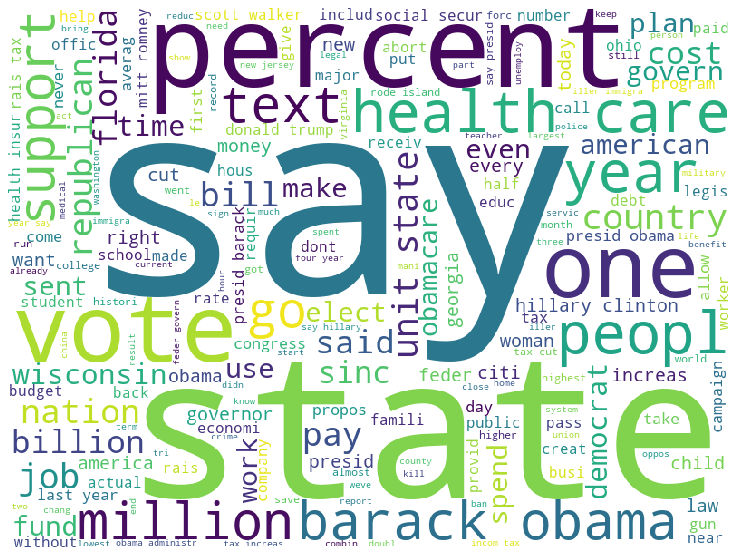

In [0]:
def cloud(data,backgroundcolor = 'white', width = 800, height = 600):
    wordcloud = WordCloud(stopwords = STOPWORDS, background_color = backgroundcolor,
                         width = width, height = height).generate(data)
    plt.figure(figsize = (15, 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()
    
cloud(' '.join(train_news['clean']))

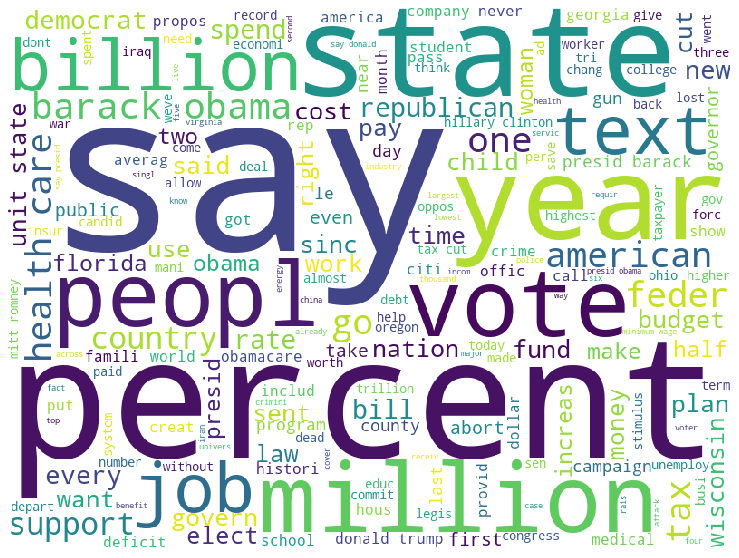

In [0]:
cloud(' '.join(test_news['clean']))

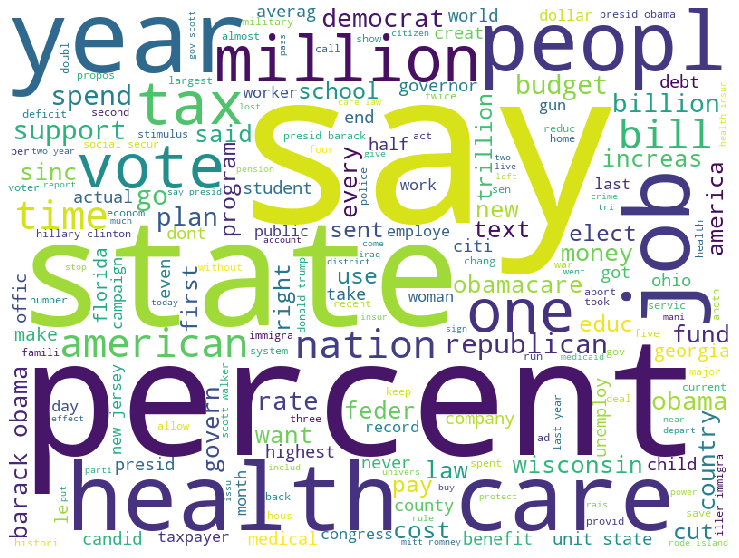

In [0]:
cloud(' '.join(valid_news['clean']))

#### Inferences from visulaization: 
- The large words are the words that are frequently appeared in the text/corpus


# Feature 1: Sentiment analysis 

#### Using Vader Sentiment Analyser

##### [Sentiment Intensity Analyzer](http://t-redactyl.io/blog/2017/04/using-vader-to-handle-sentiment-analysis-with-social-media-text.html)


> VADER, or the **Valence Aware Dictionary and sEntiment Reasoner** has created a package that performes sentiment analysis using the polarity-based, where pieces of texts are classified as either positive or negative, or valence-based, where the intensity of the sentiment is taken into account. For example, the words ‘good’ and ‘excellent’ would be treated the same in a polarity-based approach, whereas ‘excellent’ would be treated as more positive than ‘good’ in a valence-based approach

- It is based on lexicons of sentiment-related word.
- The first three, positive, neutral and negative, represent the proportion of the text that falls into those categories.
- The final metric, the compound score, is the sum of all of the lexicon ratings which have been standardised to range between -1 and 1

In [0]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [0]:
import warnings
import nltk.sentiment
warnings.filterwarnings('ignore')

senti = nltk.sentiment.vader.SentimentIntensityAnalyzer()

def print_sentiment_scores(sentence):
    snt = senti.polarity_scores(sentence)
    print("{:-<40} \n{}".format(sentence, str(snt)))
    
print_sentiment_scores(train_news['clean'][0])

say anni list polit group support third trimmest abort demand 
{'neg': 0.123, 'neu': 0.656, 'pos': 0.221, 'compound': 0.296}


/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [0]:
def get_vader_polarity(snt):
    if not snt:
        return None
    elif snt['neg'] > snt['pos'] and snt['neg'] > snt['neu']:
        return -1
    elif snt['pos'] > snt['neg'] and snt['pos'] > snt['neu']:
        return 1
    else:
        return 0

In [0]:
#Function to determine if a text is negative(-1) or postive (1) or neutral (0)
def get_polarity_type(sentence):
    sentimentVector = []
    snt = senti.polarity_scores(sentence)
    sentimentVector.append(get_vader_polarity(snt))
    sentimentVector.append(snt['neg'])
    sentimentVector.append(snt['neu'])
    sentimentVector.append(snt['pos'])
    sentimentVector.append(snt['compound'])
    
    print(sentimentVector)
    return sentimentVector

- senti.polarity_scores is a dictionary
- pos and neg indicates - positive and negative emotions in sentence
- we should be interested in compound score which calculates the final effect

In [0]:
sentiment = []
vader_pol = []
cmp_score = []
for row in train_news['clean']:
    get_pols = get_polarity_type(row)
    sentiment.append(get_pols[1:])
    vader_pol.append(get_pols[0])
    cmp_score.append(get_pols[1:][-1]) #last element 
    
train_news['sentiment_vector'] = sentiment
train_news['vader_polarity'] = vader_pol
train_news['sentiment_score'] = cmp_score

[0, 0.123, 0.656, 0.221, 0.296]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.161, 0.645, 0.194, 0.128]
[1, 0.0, 0.438, 0.562, 0.8402]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.335, 0.6, 0.065, -0.7506]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.085, 0.915, 0.0, -0.0772]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.667, 0.333, 0.6124]
[0, 0.32, 0.68, 0.0, -0.5106]
[0, 0.153, 0.657, 0.19, 0.128]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.2, 0.522, 0.278, 0.2263]
[0, 0.108, 0.773, 0.119, 0.0516]
[0, 0.198, 0.802, 0.0, -0.4939]
[0, 0.0, 0.625, 0.375, 0.7184]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.68, 0.32, 0.5106]
[0, 0.0, 0.543, 0.457, 0.6369]
[0, 0.15, 0.429, 0.421, 0.5859]
[0, 0.0, 0.843, 0.157, 0.0772]
[0, 0.0, 1.0, 0.0, 0.0]
[-1, 0.507, 0.493, 0.0, -0.802]
[0, 0.0, 0.859, 0.141, 0.2411]
[0, 0.238, 0.495, 0.267, 0.0772]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.199, 0.588, 0.213, 0.0516]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.184, 0.702, 0.114, -0.2033]
[0, 0.0, 1.0, 0.0, 0.0]


In [0]:
train_news.head(5)

,jsonid,label,headline_text,subject,speaker,speakerjobtitle,stateinfo,partyaffiliation,barelytruecounts,falsecounts,halftruecounts,mostlytrueocunts,pantsonfirecounts,context,clean,sentiment_vector,vader_polarity,sentiment_score
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer,say anni list polit group support third trimme...,"[0.123, 0.656, 0.221, 0.296]",0,0.2960
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.,decline coal start start natur gas took start ...,"[0.0, 1.0, 0.0, 0.0]",0,0.0000
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver,hillary clinton agre john mccain vote give geo...,"[0.161, 0.645, 0.194, 0.128]",0,0.1280
3,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release,health care reform legis like mandat free sex ...,"[0.0, 0.438, 0.562, 0.8402]",1,0.8402
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN,econom turnaround start end term,"[0.0, 1.0, 0.0, 0.0]",0,0.0000


In [0]:
sentiment = []
vader_pol = []
cmp_score = []

for row in test_news['clean']:
    get_pols = get_polarity_type(row)
    sentiment.append(get_pols[1:])
    vader_pol.append(get_pols[0])
    cmp_score.append(get_pols[1:][-1]) #last element 
    
    
test_news['sentiment_vector'] = sentiment
test_news['vader_polarity'] = vader_pol
test_news['sentiment_score'] = cmp_score

[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.794, 0.206, 0.0772]
[0, 0.0, 0.69, 0.31, 0.4019]
[0, 0.164, 0.469, 0.367, 0.3818]
[0, 0.169, 0.688, 0.143, -0.128]
[0, 0.0, 0.812, 0.188, 0.4588]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.239, 0.645, 0.116, -0.4404]
[0, 0.0, 0.822, 0.178, 0.0772]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.279, 0.721, 0.0, -0.4767]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.286, 0.714, 0.0, -0.34]
[0, 0.195, 0.805, 0.0, -0.5267]
[0, 0.351, 0.36, 0.288, -0.1779]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.657, 0.343, 0.5719]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.822, 0.178, 0.0772]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.241, 0.759, 0.0, -0.5859]
[0, 0.0, 0.737, 0.263, 0.3612]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.642, 0.358, 0.5994]
[0, 0.0, 0.921, 0.079, 0.0516]
[0, 0.277, 0.566, 0.157, -0.4404]
[0, 0.0, 0.735, 0.265, 0.5574]
[0, 0.0, 0.769, 0.231, 0.4588]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.182, 0.579, 0.24, 0.1779]
[0, 0.296, 0.704, 0.0, -

In [0]:
test_news.head(5)

,jsonid,label,headline_text,subject,speaker,speakerjobtitle,stateinfo,partyaffiliation,barelytruecounts,falsecounts,halftruecounts,mostlytrueocunts,pantsonfirecounts,context,clean,sentiment_vector,vader_polarity,sentiment_score
0,11972.json,true,Building a wall on the U.S.-Mexico border will...,immigration,rick-perry,Governor,Texas,republican,30,30,42,23,18,Radio interview,build wall u mexico border take liter year,"[0.0, 1.0, 0.0, 0.0]",0,0.0000
1,11685.json,false,Wisconsin is on pace to double the number of l...,jobs,katrina-shankland,State representative,Wisconsin,democrat,2,1,0,0,0,a news conference,wisconsin pace doubl number layoff year,"[0.0, 0.794, 0.206, 0.0772]",0,0.0772
2,11096.json,false,Says John McCain has done nothing to help the ...,"military,veterans,voting-record",donald-trump,President-Elect,New York,republican,63,114,51,37,61,comments on ABC's This Week.,say john mccain done noth help vet,"[0.0, 0.69, 0.31, 0.4019]",0,0.4019
3,5209.json,half-true,Suzanne Bonamici supports a plan that will cut...,"medicare,message-machine-2012,campaign-adverti...",rob-cornilles,consultant,Oregon,republican,1,1,3,1,1,a radio show,suzanne bonamici support plan cut choice medic...,"[0.164, 0.469, 0.367, 0.3818]",0,0.3818
4,9524.json,pants-fire,When asked by a reporter whether hes at the ce...,"campaign-finance,legal-issues,campaign-adverti...",state-democratic-party-wisconsin,NaN,Wisconsin,democrat,5,7,2,2,7,a web video,ask report whether he center crimini scheme vi...,"[0.169, 0.688, 0.143, -0.128]",0,-0.1280


In [0]:
sentiment = []
vader_pol = []
cmp_score = []

for row in valid_news['clean']:
    get_pols = get_polarity_type(row)
    sentiment.append(get_pols[1:])
    vader_pol.append(get_pols[0])
    cmp_score.append(get_pols[1:][-1]) #last element 
    
    
valid_news['sentiment_vector'] = sentiment
valid_news['vader_polarity'] = vader_pol
valid_news['sentiment_score'] = cmp_score

[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.13, 0.87, 0.0, -0.34]
[0, 0.383, 0.617, 0.0, -0.4767]
[0, 0.181, 0.819, 0.0, -0.4767]
[-1, 0.622, 0.378, 0.0, -0.93]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.17, 0.609, 0.222, 0.0516]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.162, 0.838, 0.0, -0.4019]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.211, 0.789, 0.0, -0.1531]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.802, 0.198, 0.6369]
[0, 0.209, 0.791, 0.0, -0.4404]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.306, 0.694, 0.0, -0.296]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.248, 0.752, 0.0, -0.6036]
[0, 0.346, 0.654, 0.0, -0.5719]
[-1, 0.524, 0.476, 0.0, -0.5106]
[1, 0.0, 0.449, 0.551, 0.8225]
[0, 0.296, 0.704, 0.0, -0.2732]
[0, 0.213, 0.551, 0.236, 0.0772]
[0, 0.0, 1.0, 0.0, 0.0]
[-1, 0.528, 0.472, 0.0, -0.7717]
[0, 0.0, 0.776, 0.224, 0.3818]
[0, 0.226, 0.685, 0.089, -0.4588]
[0, 0.327, 0.442, 0.23, -0.2732]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.196, 0.804, 0.0, -0.296]
[0, 0.0, 1.0, 0.0, 0

In [0]:
valid_news.head(5)

,jsonid,label,headline_text,subject,speaker,speakerjobtitle,stateinfo,partyaffiliation,barelytruecounts,falsecounts,halftruecounts,mostlytrueocunts,pantsonfirecounts,context,clean,sentiment_vector,vader_polarity,sentiment_score
0,12134.json,barely-true,We have less Americans working now than in the...,"economy,jobs",vicky-hartzler,U.S. Representative,Missouri,republican,1,0,1,0,0,an interview with ABC17 News,le american work,"[0.0, 1.0, 0.0, 0.0]",0,0.0000
1,238.json,pants-fire,"When Obama was sworn into office, he DID NOT u...","obama-birth-certificate,religion",chain-email,NaN,NaN,none,11,43,8,5,105,NaN,obama sworn offic use holi bill instead kura e...,"[0.0, 1.0, 0.0, 0.0]",0,0.0000
2,7891.json,false,Says Having organizations parading as being so...,"campaign-finance,congress,taxes",earl-blumenauer,U.S. representative,Oregon,democrat,0,1,1,1,0,a U.S. Ways and Means hearing,say organ parade social welfare organ involv p...,"[0.13, 0.87, 0.0, -0.34]",0,-0.3400
3,8169.json,half-true,Says nearly half of Oregons children are poor.,poverty,jim-francesconi,Member of the State Board of Higher Education,Oregon,none,0,1,1,1,0,an opinion article,say near half oregon child poor,"[0.383, 0.617, 0.0, -0.4767]",0,-0.4767
4,929.json,half-true,On attacks by Republicans that various program...,"economy,stimulus",barack-obama,President,Illinois,democrat,70,71,160,163,9,interview with CBS News,attack republican various program econom stimu...,"[0.181, 0.819, 0.0, -0.4767]",0,-0.4767


##### Saved the trained dataset into a seperate CSV file 

In [0]:
train_news.to_csv("/content/drive/My Drive/MLFall2019/[project-team-name]/StockMarketPrediction-Transformers/Datasets/train_sentiment.csv", sep=',')
test_news.to_csv("/content/drive/My Drive/MLFall2019/[project-team-name]/StockMarketPrediction-Transformers/Datasets/test_sentiment.csv", sep=',')
valid_news.to_csv("/content/drive/My Drive/MLFall2019/[project-team-name]/StockMarketPrediction-Transformers/Datasets/valid_sentiment.csv", sep=',')

In [0]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.linear_model import  LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem.porter import *
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

class SentimentAnalysis():

    def __init__(self):        

        columnNames = ["jsonid", "label", "headline_text", "subject", "speaker", "speaker_job_title", "state_info", "party_affiliation", "barely_true_counts", "false_counts", "half_true_counts", "mostly_true_counts", "pants_on_fire_counts", "context","clean", "sentiment_vector","vader_polarity", "sentiment_score"]
        dataTrain = pd.read_csv("/content/drive/My Drive/MLFall2019/[project-team-name]/StockMarketPrediction-Transformers/Datasets/train_sentiment.csv", sep=',', header=None, names = columnNames)
        dataTest = pd.read_csv("/content/drive/My Drive/MLFall2019/[project-team-name]/StockMarketPrediction-Transformers/Datasets/test_sentiment.csv", sep=',', header=None, names = columnNames)

        #dropping columns
        columnsToRemove = ['jsonid', 'label', 'subject', 'speaker','speaker_job_title', 'state_info', 'party_affiliation', 'barely_true_counts', 'false_counts', 'half_true_counts', 'mostly_true_counts', 'pants_on_fire_counts', 'context', 'sentiment_vector']
        dataTrain = dataTrain.drop(columns=columnsToRemove)
        dataTest = dataTest.drop(columns=columnsToRemove)
        dataTrain = dataTrain.loc[1:] 
        dataTest = dataTest.loc[1:]
    
    
        tfidfV = TfidfVectorizer(stop_words='english', min_df=5, max_df=30, use_idf=True, smooth_idf=True, token_pattern=u'(?ui)\\b\\w*[a-z]+\\w*\\b')

        self.logR_pipeline = Pipeline([
                ('LogRCV', tfidfV),
                ('LogR_clf',LogisticRegression(solver='liblinear', C=32/100))
                ])

        self.logR_pipeline.fit(dataTrain['headline_text'],dataTrain['vader_polarity'])
        predicted_LogR = self.logR_pipeline.predict(dataTest['headline_text'])
        score = metrics.accuracy_score(dataTest['vader_polarity'], predicted_LogR)
        print("Sentiment Analysis Model Trained - accuracy:   %0.6f" % score)
        

    def predict(self, text):
        predicted = self.logR_pipeline.predict([text])
        predicedProb = self.logR_pipeline.predict_proba([text])[:,1]
        return bool(predicted), float(predicedProb)
    
    
sa = SentimentAnalysis()
sa.predict("Says the Annies List political group supports third-trimester abortions on demand.")

Sentiment Analysis Model Trained - accuracy:   0.943918


(True, 0.9448046694778502)

In [0]:
SentimentAnalysis = SentimentAnalysis()

Sentiment Analysis Model Trained - accuracy:   0.943918


In [0]:
def DATAMINERS_getSentimentAnalysisScore(text):  # return between 0 and 1, being 0 = True,  1 = Fake
    #print(clickBait.predict("Should You bring the money now"))
    binaryValue, probValue = SentimentAnalysis.predict(text)
    return (float(probValue))

print(DATAMINERS_getSentimentAnalysisScore("Says the Annies List political group supports third-trimester abortions on demand."))

0.9448046694778502


# Feature 2:  LDA Topic Modelling 


In [0]:
train_news['index'] = train_news.index
data = train_news
train_lda = data[['clean', 'index']]
train_lda.head(4)

,clean,index
0,say anni list polit group support third trimme...,0
1,decline coal start start natur gas took start ...,1
2,hillary clinton agre john mccain vote give geo...,2
3,health care reform legis like mandat free sex ...,3


In [0]:
test_news['index'] = test_news.index
data = test_news
test_lda = data[['clean', 'index']]
test_lda.head(4)

,clean,index
0,build wall u mexico border take liter year,0
1,wisconsin pace doubl number layoff year,1
2,say john mccain done noth help vet,2
3,suzanne bonamici support plan cut choice medic...,3


In [0]:
valid_news['index'] = valid_news.index
data = valid_news
valid_lda = data[['clean', 'index']]
valid_lda.head(4)

,clean,index
0,le american work,0
1,obama sworn offic use holi bill instead kura e...,1
2,say organ parade social welfare organ involv p...,2
3,say near half oregon child poor,3


#### Split the clean news into list of words

In [0]:
processed_docs = train_lda['clean'].map(lambda doc: doc.split(" "))
processed_docs[:4]

0    [say, anni, list, polit, group, support, third...
1    [decline, coal, start, start, natur, gas, took...
2    [hillary, clinton, agre, john, mccain, vote, g...
3    [health, care, reform, legis, like, mandat, fr...
Name: clean, dtype: object

### Latent Dirichlet Allocation (LDA)

> It is an example of a probabilistic topic model. Topic models are a great way to automatically explore and structure a large set of documents: they group or cluster documents based on the words that occur in them. As documents on similar topics tend to use a similar sub-vocabulary, the resulting clusters of documents can be interpreted as discussing different 'topics'.

In [0]:
def get_word_tokens(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if len(token) > 3:
            result.append(token)
    return result
tokenized_docs_local = train_news['clean'].map(get_word_tokens)

### Create a function to build the dictionary and tokenized docs for given feature

Below function does the following
* #### Dictionary
Returns Dictionary given, dataframe and column name
* #### Tokenizeddocs
Returns Tokenizeddocs, of the all the words in a text in that column can be used for bow_corpus
* #### Dictionary is filtered using Gensim filter_extremes
    Filter out tokens that appear in less than 15 documents (absolute number) or more than 0.5 documents (fraction of total corpus size, not absolute number). after the above two steps, keep only the first 100000 most frequent tokens.


In [0]:
def get_dictionary_print_words(dataframe,colname):
    dictionary_gensim = gensim.corpora.Dictionary(processed_docs)
    count = 0
    print('######## DICTIONARY Words and occurences ########')
    for k, v in dictionary_gensim.iteritems():
        print(k, v)
        count += 1
        if count > 10:
            break
    dictionary_gensim.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)
    return dictionary_gensim, tokenized_docs_local

#### Gensim filter_extremes

> Filter out tokens that appear less than 15 documents (absolute number) or more than 0.5 documents (fraction of total corpus size, not absolute number). after the above two steps, keep only the first 100000 most frequent tokens.

#### Create a function to build bow_corpus from dictionary and tokenized_docs

In [0]:
def get_bow_corpus_print_sample(dataframe,colname):
    dictionary_gensim, tokenized_docs_local = get_dictionary_print_words(dataframe, colname)
    bow_corpus_local = [dictionary_gensim.doc2bow(doc) for doc in tokenized_docs_local]
    bow_doc_local_0 = bow_corpus_local[0]
    print('\n ######## BOW VECTOR FIRST ITEM ########')
    print(bow_doc_local_0)
    print('\n ######## PREVIEW BOW ########')
    for i in range(len(bow_doc_local_0)):
        print("Word {} (\"{}\") appears {} time.".format(bow_doc_local_0[i][0], 
                                               dictionary_gensim[bow_doc_local_0[i][0]], bow_doc_local_0[i][1]))
    return bow_corpus_local, dictionary_gensim

**Gensim doc2bow**

For each document we create a dictionary reporting how many words and how many times those words appear. Save this to ‘bow_corpus’, then check our selected document earlier

#### Create a function to build tfidf_corpus from bow_corpus

Create tf-idf model object using models.TfidfModel on ‘bow_corpus’ and save it to ‘tfidf’, then apply transformation to the entire corpus and call it ‘corpus_tfidf’. Finally we preview TF-IDF scores for our first document.

In [0]:
def get_tfidf_corpus_print_sample(bow_corpus_local):
    from gensim import corpora, models
    tfidf = models.TfidfModel(bow_corpus_local)
    tfidf_corpus_local = tfidf[bow_corpus_local]
    print('\n ######## TFIDF VECTOR FIRST ITEM ########')
    
    from pprint import pprint
    for doc in tfidf_corpus_local:
        pprint(doc)
        break
    return tfidf_corpus_local

#### Create a function to run ldamodel and print top 10 topics

In [0]:
def get_lda_model_print_top_topics(bow_corpusforlda,numtopics,dictionaryforlda):
    lda_model = gensim.models.LdaMulticore(bow_corpusforlda, num_topics=numtopics, id2word=dictionaryforlda, passes=2, workers=2)
    lda_all_topics=lda_model.show_topics(num_topics=numtopics, num_words=10,formatted=False)
    lda_topics_words = [(tp[0], [wd[0] for wd in tp[1]]) for tp in lda_all_topics]

    #Below Code Prints Topics and Words
    for topic,words in lda_topics_words:
        print(str(topic)+ "::"+ str(words))
    return lda_model

#### Create a function to run ldamodel and print top 10 topics

In [0]:
def get_lda_model_topics_topwords_print_top_topics(bow_corpusforlda,numtopics,dictionaryforlda):
    lda_model = gensim.models.LdaMulticore(bow_corpusforlda, num_topics=numtopics, id2word=dictionaryforlda, passes=2, workers=2, random_state=1)
    lda_all_topics=lda_model.show_topics(num_topics=numtopics, num_words=10,formatted=False)
    lda_topics_words = [(tp[0], [wd[0] for wd in tp[1]]) for tp in lda_all_topics]

    #Below Code Prints Topics and Words
    for topic,words in lda_topics_words:
        print(str(topic)+ "::"+ str(words))
    return lda_model,lda_topics_words

#### Create a function to enrich data with lda topics, lda topics score, top words

In [0]:
def identify_topic_number_score_label_topwords(text,dictionary_local,lda_model_local,lda_topics_top_words_local):
    bow_vector_local = dictionary_local.doc2bow(get_word_tokens(text))
    topic_number_local, topic_score_local = sorted(
        lda_model_local[bow_vector_local], key=lambda tup: -1*tup[1])[0]
    #print (topic_number_local, topic_score_local)
    return pd.Series([topic_number_local, topic_score_local," ".join(lda_topics_top_words_local[int(topic_number_local)][1])])

#### Create a function that can enrich topic data to dataframe

In [0]:
def update_lda_results_to_dataset(dataframe,topiccolnames,coltoapplylda,colnamedictionary,colnameldamodel, colnameldatopwords):
    dataframe[topiccolnames] = dataframe.apply(
    lambda row: identify_topic_number_score_label_topwords(
        row[coltoapplylda],colnamedictionary,colnameldamodel,
        colnameldatopwords), axis=1)
    return dataframe

### Bag of Words

#### Create a dictionary and tokens

> Create a dictionary from ‘processed_docs’ containing the number of times a word appears in the training set.

#### Create a function to convert text to word tokens from cleaned dataset

In [0]:
bow_corpus_headline, dictionary_headline = get_bow_corpus_print_sample(train_news,
                                                                      'clean')

######## DICTIONARY Words and occurences ########
0 abort
1 anni
2 demand
3 group
4 list
5 polit
6 say
7 support
8 third
9 trimmest
10 administr

 ######## BOW VECTOR FIRST ITEM ########
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (6, 1), (7, 1)]

 ######## PREVIEW BOW ########
Word 0 ("abort") appears 1 time.
Word 1 ("demand") appears 1 time.
Word 2 ("group") appears 1 time.
Word 3 ("list") appears 1 time.
Word 4 ("polit") appears 1 time.
Word 6 ("support") appears 1 time.
Word 7 ("third") appears 1 time.


### Running LDA using Bag of Words
Train our lda model using gensim.models.LdaMulticore and save it to ‘lda_model’

In [0]:
lda_model_headline, lda_headline_topic_words = get_lda_model_topics_topwords_print_top_topics(
    bow_corpus_headline, 10 ,dictionary_headline)

0::['vote', 'sent', 'republican', 'support', 'state', 'democrat', 'obama', 'romney', 'percent', 'would']
1::['percent', 'state', 'time', 'averag', 'american', 'school', 'year', 'hous', 'billion', 'rais']
2::['presid', 'obama', 'country', 'bill', 'barack', 'state', 'bush', 'year', 'billion', 'florida']
3::['year', 'percent', 'school', 'would', 'budget', 'public', 'every', 'state', 'obama', 'spend']
4::['obama', 'state', 'nation', 'said', 'million', 'peopl', 'work', 'presid', 'clinton', 'text']
5::['percent', 'year', 'million', 'state', 'obama', 'time', 'rate', 'peopl', 'presid', 'wisconsin']
6::['percent', 'increas', 'american', 'peopl', 'state', 'year', 'health', 'sinc', 'care', 'vote']
7::['year', 'last', 'state', 'million', 'health', 'vote', 'creat', 'number', 'nation', 'would']
8::['health', 'care', 'state', 'year', 'cost', 'would', 'percent', 'plan', 'insur', 'budget']
9::['state', 'trump', 'unit', 'donald', 'georgia', 'want', 'clinton', 'percent', 'feder', 'iller']


#### Generate TF-IDF bow_corpus
Create tf-idf model object using models.TfidfModel on ‘bow_corpus’ and save it to ‘tfidf’, then apply transformation to the entire corpus and call it ‘corpus_tfidf’. Finally we preview TF-IDF scores for our first document.

In [0]:
tfidf_corpus_headline = get_tfidf_corpus_print_sample(bow_corpus_headline)


 ######## TFIDF VECTOR FIRST ITEM ########
[(0, 0.3213684467163471),
 (1, 0.45885933393208955),
 (2, 0.3867148870952622),
 (3, 0.4388676762258462),
 (4, 0.3854712129906647),
 (6, 0.25709294587835624),
 (7, 0.3596280760961804)]


### Running LDA model using Bag of Words
Train our lda model using gensim.models.LdaMulticore and save it to ‘lda_model’

**GOAL**: To get top ten topics with top words. 

In [0]:
lda_tfidf_model_headline  = get_lda_model_print_top_topics(tfidf_corpus_headline,10,dictionary_headline)

0::['year', 'already', 'time', 'state', 'number', 'percent', 'court', 'sinc', 'pass', 'florida']
1::['vote', 'county', 'percent', 'republican', 'state', 'budget', 'deficit', 'democrat', 'year', 'time']
2::['year', 'state', 'percent', 'health', 'time', 'support', 'care', 'cost', 'million', 'would']
3::['obama', 'trump', 'percent', 'presid', 'increas', 'state', 'donald', 'barack', 'year', 'muslim']
4::['year', 'health', 'million', 'rick', 'billion', 'every', 'insur', 'state', 'care', 'text']
5::['percent', 'american', 'island', 'rode', 'plan', 'nation', 'year', 'averag', 'debt', 'peopl']
6::['percent', 'famili', 'health', 'incom', 'state', 'care', 'plan', 'would', 'obama', 'year']
7::['obama', 'presid', 'barack', 'said', 'campaign', 'woman', 'privat', 'peopl', 'year', 'abort']
8::['obamacare', 'sent', 'state', 'percent', 'year', 'bill', 'country', 'peopl', 'check', 'white']
9::['state', 'unit', 'spend', 'unemploy', 'year', 'percent', 'every', 'rate', 'billion', 'fund']


#### Explanation for LDA 
![[Explanation of LDA](http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1508239587/n4ZpIXl_egq7mq.png)](http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1508239587/n4ZpIXl_egq7mq.png)

### Semisupervised Labeling
Based on train,test and valid data explored the topic scores for sample data and identified below topics

In [0]:
semisupervised_topic_labels = ['topic0','topic1','topic2','topic3','topic4','topic5','topic6','topic7','topic8','topic9']

####  Function to add topicnumber, topicscore, topiclabel, topwords

In [0]:
headlinetopiccolnames = ['topic_number','lda_score','topic_top_words']
train_news = update_lda_results_to_dataset(
    train_news, headlinetopiccolnames,'clean', dictionary_headline, lda_model_headline, lda_headline_topic_words)
train_news.head()

,jsonid,label,headline_text,subject,speaker,speakerjobtitle,stateinfo,partyaffiliation,barelytruecounts,falsecounts,halftruecounts,mostlytrueocunts,pantsonfirecounts,context,clean,sentiment_vector,vader_polarity,sentiment_score,index,topic_number,lda_score,topic_top_words
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer,say anni list polit group support third trimme...,"[0.123, 0.656, 0.221, 0.296]",0,0.2960,0,4,0.642002,obama state nation said million peopl work pre...
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.,decline coal start start natur gas took start ...,"[0.0, 1.0, 0.0, 0.0]",0,0.0000,1,5,0.930748,percent year million state obama time rate peo...
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver,hillary clinton agre john mccain vote give geo...,"[0.161, 0.645, 0.194, 0.128]",0,0.1280,2,6,0.486886,percent increas american peopl state year heal...
3,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release,health care reform legis like mandat free sex ...,"[0.0, 0.438, 0.562, 0.8402]",1,0.8402,3,8,0.654623,health care state year cost would percent plan...
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN,econom turnaround start end term,"[0.0, 1.0, 0.0, 0.0]",0,0.0000,4,7,0.454690,year last state million health vote creat numb...


In [0]:
test_news = update_lda_results_to_dataset(
    test_news,headlinetopiccolnames,'clean',
  dictionary_headline,lda_model_headline,lda_headline_topic_words)
test_news.head()

,jsonid,label,headline_text,subject,speaker,speakerjobtitle,stateinfo,partyaffiliation,barelytruecounts,falsecounts,halftruecounts,mostlytrueocunts,pantsonfirecounts,context,clean,sentiment_vector,vader_polarity,sentiment_score,index,topic_number,lda_score,topic_top_words
0,11972.json,true,Building a wall on the U.S.-Mexico border will...,immigration,rick-perry,Governor,Texas,republican,30,30,42,23,18,Radio interview,build wall u mexico border take liter year,"[0.0, 1.0, 0.0, 0.0]",0,0.0000,0,4,0.871365,obama state nation said million peopl work pre...
1,11685.json,false,Wisconsin is on pace to double the number of l...,jobs,katrina-shankland,State representative,Wisconsin,democrat,2,1,0,0,0,a news conference,wisconsin pace doubl number layoff year,"[0.0, 0.794, 0.206, 0.0772]",0,0.0772,1,7,0.626577,year last state million health vote creat numb...
2,11096.json,false,Says John McCain has done nothing to help the ...,"military,veterans,voting-record",donald-trump,President-Elect,New York,republican,63,114,51,37,61,comments on ABC's This Week.,say john mccain done noth help vet,"[0.0, 0.69, 0.31, 0.4019]",0,0.4019,2,8,0.551877,health care state year cost would percent plan...
3,5209.json,half-true,Suzanne Bonamici supports a plan that will cut...,"medicare,message-machine-2012,campaign-adverti...",rob-cornilles,consultant,Oregon,republican,1,1,3,1,1,a radio show,suzanne bonamici support plan cut choice medic...,"[0.164, 0.469, 0.367, 0.3818]",0,0.3818,3,8,0.849980,health care state year cost would percent plan...
4,9524.json,pants-fire,When asked by a reporter whether hes at the ce...,"campaign-finance,legal-issues,campaign-adverti...",state-democratic-party-wisconsin,NaN,Wisconsin,democrat,5,7,2,2,7,a web video,ask report whether he center crimini scheme vi...,"[0.169, 0.688, 0.143, -0.128]",0,-0.1280,4,8,0.574378,health care state year cost would percent plan...


In [0]:
valid_news = update_lda_results_to_dataset(
    valid_news,headlinetopiccolnames,'clean',
  dictionary_headline,lda_model_headline,lda_headline_topic_words)
valid_news.head()

,jsonid,label,headline_text,subject,speaker,speakerjobtitle,stateinfo,partyaffiliation,barelytruecounts,falsecounts,halftruecounts,mostlytrueocunts,pantsonfirecounts,context,clean,sentiment_vector,vader_polarity,sentiment_score,index,topic_number,lda_score,topic_top_words
0,12134.json,barely-true,We have less Americans working now than in the...,"economy,jobs",vicky-hartzler,U.S. Representative,Missouri,republican,1,0,1,0,0,an interview with ABC17 News,le american work,"[0.0, 1.0, 0.0, 0.0]",0,0.0000,0,4,0.699911,obama state nation said million peopl work pre...
1,238.json,pants-fire,"When Obama was sworn into office, he DID NOT u...","obama-birth-certificate,religion",chain-email,NaN,NaN,none,11,43,8,5,105,NaN,obama sworn offic use holi bill instead kura e...,"[0.0, 1.0, 0.0, 0.0]",0,0.0000,1,2,0.599063,presid obama country bill barack state bush ye...
2,7891.json,false,Says Having organizations parading as being so...,"campaign-finance,congress,taxes",earl-blumenauer,U.S. representative,Oregon,democrat,0,1,1,1,0,a U.S. Ways and Means hearing,say organ parade social welfare organ involv p...,"[0.13, 0.87, 0.0, -0.34]",0,-0.3400,2,4,0.558868,obama state nation said million peopl work pre...
3,8169.json,half-true,Says nearly half of Oregons children are poor.,poverty,jim-francesconi,Member of the State Board of Higher Education,Oregon,none,0,1,1,1,0,an opinion article,say near half oregon child poor,"[0.383, 0.617, 0.0, -0.4767]",0,-0.4767,3,4,0.849964,obama state nation said million peopl work pre...
4,929.json,half-true,On attacks by Republicans that various program...,"economy,stimulus",barack-obama,President,Illinois,democrat,70,71,160,163,9,interview with CBS News,attack republican various program econom stimu...,"[0.181, 0.819, 0.0, -0.4767]",0,-0.4767,4,0,0.575555,vote sent republican support state democrat ob...


### Visualize the LDA Distribution of news against Top 10 Topics

**GOAL 1:** *Each of the N documents will be represented in the LDA model by a vector of length M*
**GOAL 2:** *Each of the M topics is represented by a vector of length V*

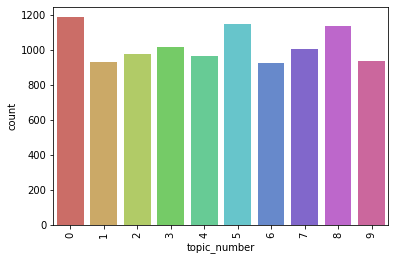

In [0]:
import seaborn as sb
def create_distribution(dataFile):
    g = sb.countplot(x='topic_number', data=dataFile, palette='hls')
    g.set_xticklabels(g.get_xticklabels(),rotation=90)

    return g

create_distribution(train_news) # TRAIN Document Vector

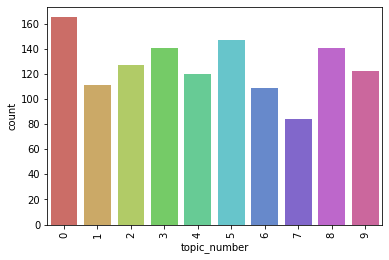

In [0]:
create_distribution(test_news)# TEST Document Vector

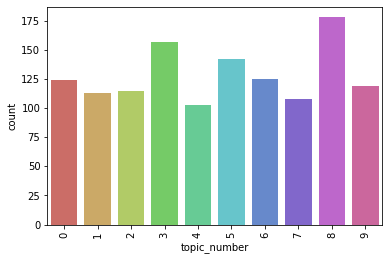

In [0]:
create_distribution(valid_news)# VALID Document Vector

##### Saved the latest dataset into a seperate CSV file 

In [0]:
train_news.to_csv("/content/drive/My Drive/MLFall2019/[project-team-name]/StockMarketPrediction-Transformers/Datasets/train_lda.csv", sep=',')
test_news.to_csv("/content/drive/My Drive/MLFall2019/[project-team-name]/StockMarketPrediction-Transformers/Datasets/test_lda.csv", sep=',')
valid_news.to_csv("/content/drive/My Drive/MLFall2019/[project-team-name]/StockMarketPrediction-Transformers/Datasets/valid_lda.csv", sep=',')

In [0]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.linear_model import  LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem.porter import *
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

class LDATopicModelling():

    def __init__(self):        

        columnNames = ["jsonid", "label", "headline_text", "subject", "speaker", "speaker_job_title", "state_info", "party_affiliation", "barely_true_counts", "false_counts", "half_true_counts", "mostly_true_counts", "pants_on_fire_counts", "context","clean", "sentiment_vector","vader_polarity", "sentiment_score", "index", "topic_number", "lda_score", "topic_top_words"]
        dataTrain = pd.read_csv("/content/drive/My Drive/MLFall2019/[project-team-name]/StockMarketPrediction-Transformers/Datasets/train_lda.csv", sep=',', header=None, names = columnNames)
        dataTest = pd.read_csv("/content/drive/My Drive/MLFall2019/[project-team-name]/StockMarketPrediction-Transformers/Datasets/test_lda.csv", sep=',', header=None, names = columnNames)

        #dropping columns
        columnsToRemove = ['jsonid', 'label', 'subject', 'speaker','speaker_job_title', 'state_info', 'party_affiliation', 'barely_true_counts', 'false_counts', 'half_true_counts', 'mostly_true_counts', 'pants_on_fire_counts', 'context', 'sentiment_vector', 'sentiment_vector','vader_polarity', 'sentiment_score', 'index']
        dataTrain = dataTrain.drop(columns=columnsToRemove)
        dataTest = dataTest.drop(columns=columnsToRemove)
        dataTrain = dataTrain.loc[1:] 
        dataTest = dataTest.loc[1:]
    
    
        tfidfV = TfidfVectorizer(stop_words='english', min_df=5, max_df=30, use_idf=True, smooth_idf=True, token_pattern=u'(?ui)\\b\\w*[a-z]+\\w*\\b')

        self.logR_pipeline = Pipeline([
                ('LogRCV', tfidfV),
                ('LogR_clf',LogisticRegression(solver='liblinear', C=32/100))
                ])

        self.logR_pipeline.fit(dataTrain['headline_text'],dataTrain['topic_number'])
        predicted_LogR = self.logR_pipeline.predict(dataTest['headline_text'])
        score = metrics.accuracy_score(dataTest['topic_number'], predicted_LogR)
        print("LDA Topic Model Trained - accuracy:   %0.6f" % score)
        

    def predict(self, text):
        predicted = self.logR_pipeline.predict([text])
        predicedProb = self.logR_pipeline.predict_proba([text])[:,1]
        return bool(predicted), float(predicedProb)
    
    
# lda = LDATopicModelling()
# lda.predict("Says the Annies List political group supports third-trimester abortions on demand.")

In [0]:
ldaTopicModelling = LDATopicModelling()

LDA Topic Model Trained - accuracy:   0.328594


In [0]:
def DATAMINERS_getLDATopicModellingScore(text):  # return between 0 and 1, being 0 = True,  1 = Fake
    #print(clickBait.predict("Should You bring the money now"))
    binaryValue, probValue = ldaTopicModelling.predict(text)
    return (float(probValue))

print(DATAMINERS_getLDATopicModellingScore("Says the Annies List political group supports third-trimester abortions on demand."))

0.08185803576455541


# Feature 3:  Sensational Feature Analysis

#### [Sensational Words Corpus](https://www.thepersuasionrevolution.com/380-high-emotion-persuasive-words/)

>  Words aren’t just strings of alphabets sewn together with ink. Words are cues. Words are triggers. Words when used correctly can transform an “eh whatever” into “wow that’s it!”. Words can make you go from literally ROFL to fuming with fury to an uncontrollable-urge-to-take-action-NOW-or-the-earth-may-stop-swinging -on-its-axis.

> Highly emotional words are capable capable of transforming an absolute no into almost yes and a “perhaps” into “for sure”!

Words that are used:
- When you are trying to sell people a solution
- When you are trying to get them to take an action (like, share, subscribe, buy)
- When you are trying to get people to click and read your article
- When you are trying to get someone to agree with you

**There are 1400+ words that are both positive and negative emotions that will help to predict the sensational score for an article**

> I have used these words to perform cosin similarity and predict the sensational similarity score for each news in the give dataset.

In [0]:
columnNames = ["jsonid", "label", "headline_text", "subject", "speaker", "speaker_job_title", "state_info", "party_affiliation", "barely_true_counts", "false_counts", "half_true_counts", "mostly_true_counts", "pants_on_fire_counts", "context","clean", "sentiment_vector","vader_polarity", "sentiment_score", "index", "topic_number", "lda_score", "topic_top_words"]
dataTrain = pd.read_csv("/content/drive/My Drive/MLFall2019/[project-team-name]/StockMarketPrediction-Transformers/Datasets/train_lda.csv", sep=',', header=None, names = columnNames)
dataTest = pd.read_csv("/content/drive/My Drive/MLFall2019/[project-team-name]/StockMarketPrediction-Transformers/Datasets/test_lda.csv", sep=',', header=None, names = columnNames)

#dropping columns

columnsToRemove = ['jsonid', 'label', 'subject', 'speaker','speaker_job_title', 'state_info', 'party_affiliation', 'barely_true_counts', 'false_counts', 'half_true_counts', 'mostly_true_counts', 'pants_on_fire_counts', 'context', 'sentiment_vector', 'sentiment_vector','vader_polarity', 'sentiment_score', 'index', 'topic_number', 'lda_score', 'topic_top_words']
train_news = dataTrain.drop(columns=columnsToRemove)
test_news = dataTest.drop(columns=columnsToRemove)
train_news = train_news.loc[1:] 
test_news = test_news.loc[1:]
    

In [0]:
corpus = []
for i in train_news['clean']:
    corpus.append(i)
# corpus

sensational_corpus=[]
sensational_words = pd.read_csv("/content/drive/My Drive/MLFall2019/[project-team-name]/StockMarketPrediction-Transformers/Datasets/input_data/sensationalism/sensational_words_dict.csv", sep="\t+", header=None, usecols=[0] )
print(len(sensational_words))
sensational_dictionary = ' '.join(sensational_words[0].astype(str))
sensational_corpus.append(sensational_dictionary)

1443


## SenticNet:   

#### Data Enrichment 

> It provides polarity associated with 50,000 natural language concepts. A polarity is a floating number between -1 and +1. Minus one is extreme negativity, and plus one is extreme positivity. The knowledge base is free. It can be downloaded as XML file. 
SenticNet 5 reaches 100,000 commonsense concepts by employing recurrent neural networks to infer primitives by lexical substitution.

In [0]:
from sklearn.preprocessing import scale
import warnings
warnings.filterwarnings("ignore")
sentic_net = pd.read_csv("/content/drive/My Drive/MLFall2019/[project-team-name]/StockMarketPrediction-Transformers/Datasets/input_data/sensationalism/senticnet5.txt", sep="\t+", header=None, usecols=[0,1,2], names = ["Token", "Polarity", "Intensity"])
sentic_net = sentic_net[~sentic_net['Token'].str.contains('|'.join('_'),na=False)]
sentic_net = sentic_net.reset_index(drop=True)
print("Senticnet Vocab Size: ",len(sentic_net))
print(sentic_net.head(10))

Senticnet Vocab Size:  39891
         Token  Polarity  Intensity
0      abandon  negative      -0.84
1    abandoned  negative      -0.85
2  abandonment  negative      -0.82
3        abase  negative      -0.90
4    abasement  negative      -0.90
5        abash  negative      -0.77
6      abashed  negative      -0.92
7    abashment  negative      -0.76
8       abasia  negative      -0.67
9        abate  negative      -0.86


In [0]:
# sentic_net['Token'] provides list of words from the SenticNet DICTIONARY
senti_pos = sentic_net.loc[sentic_net.Polarity == "positive"]
senti_pos = senti_pos.loc[senti_pos.Intensity > 0.90]
dictionary = ' '.join(senti_pos.Token.astype(str))
sensational_corpus.append(dictionary)
print(len(senti_pos))

2040


## TF-IDF and Cosine Similarity

#### TF-IDF

> TF-IDF (Term Frequency - Inverse Document Frequency) can be represented tf(d,t) X idf(t). TF-IDF uses the method diminishing the weight (importance) of words appeared in many documents in common, considered them incapable of discerning the documents, rather than simply counting the frequency of words as CountVectorizer does. The outcome matrix consists of each document (row) and each word (column) and the importance (weight) computed by tf * idf (values of the matrix)

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfVec = TfidfVectorizer(max_features=1000)

tfidf_corpus = tfidfVec.fit_transform(corpus)
tf_idf_senti = tfidfVec.fit_transform(sensational_corpus)
words = tfidfVec.get_feature_names()

In [0]:
tfidf_corpus.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [0]:
tf_idf_senti.toarray()

array([[0.02934579, 0.05869158, 0.05869158, ..., 0.        , 0.        ,
        0.08803737],
       [0.        , 0.        , 0.        , ..., 0.19269152, 0.06423051,
        0.        ]])

In [0]:
tfidfVec.vocabulary_

{'absolutely': 1,
 'advantage': 3,
 'qaeda': 742,
 'amazing': 4,
 'antagonistic': 6,
 'attack': 14,
 'authentic': 15,
 'authority': 16,
 'banned': 21,
 'behind': 24,
 'the': 929,
 'scenes': 881,
 'best': 26,
 'bill': 28,
 'bitterness': 29,
 'black': 31,
 'market': 187,
 'blacklisted': 32,
 'blissful': 34,
 'up': 990,
 'breathtaking': 37,
 'campaign': 40,
 'for': 95,
 'censored': 42,
 'cheer': 44,
 'cheerful': 45,
 'church': 47,
 'class': 48,
 'concealed': 52,
 'confessions': 53,
 'confidential': 55,
 'control': 59,
 'controversial': 61,
 'cost': 62,
 'cover': 63,
 'crime': 64,
 'critical': 65,
 'infrastructure': 126,
 'cyber': 67,
 'security': 886,
 'terror': 928,
 'daring': 68,
 'of': 388,
 'desire': 71,
 'disastrous': 72,
 'drug': 76,
 'ecstatic': 79,
 'on': 409,
 'emergency': 81,
 'response': 859,
 'enforcement': 83,
 'eye': 85,
 'opening': 415,
 'faith': 86,
 'faithfulness': 87,
 'fbi': 89,
 'first': 93,
 'responder': 858,
 'high': 118,
 'forbidden': 96,
 'force': 97,
 'fire': 92,


In [0]:
train_tfidf = tfidfVec.fit_transform(train_news['clean'])
print('Training dim:', train_tfidf.shape)
print(train_tfidf.A[:10])


test_tfidf = tfidfVec.fit_transform(test_news['clean'])
print('Test dim:', test_tfidf.shape)
print(test_tfidf.A[:10])


# valid_tfidf = tfidfVec.fit_transform(valid_news['clean'])
# print('Valid dim:', valid_tfidf.shape)
# print(valid_tfidf.A[:10])

Training dim: (10239, 1000)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Test dim: (1266, 1000)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]



#### Cosine Similarity Score

> The cosine similarity between two vectors (or two documents on the Vector Space) is a measure that calculates the cosine of the angle between them. This metric is a measurement of orientation and not magnitude, it can be seen as a comparison between documents on a normalized space because we’re not taking into the consideration only the magnitude of each word count (tf-idf) of each document, but the angle between the documents.

> I have compared the sentiment vector of each doucment and estimated a similarity score which is saved as a column in the training and test dataset. 

In [0]:
# from sklearn.metrics.pairwise import cosine_similarity
from scipy import spatial
similarity_score = []
for i in range(len(train_tfidf.toarray())):
    similarity_score.append(1 - spatial.distance.cosine(tf_idf_senti[0].toarray(), tfidf_corpus[i].toarray()))

In [0]:
train_news['sensational_score'] = similarity_score
train_news.head(5)

,headline_text,clean,sensational_score
1.0,When did the decline of coal start? It started...,decline coal start start natur gas took start ...,0.061786
2.0,"Hillary Clinton agrees with John McCain ""by vo...",hillary clinton agre john mccain vote give geo...,0.059743
3.0,Health care reform legislation is likely to ma...,health care reform legis like mandat free sex ...,0.052559
4.0,The economic turnaround started at the end of ...,econom turnaround start end term,0.066800
5.0,The Chicago Bears have had more starting quart...,chicago bear start quarterback last year total...,0.048691


In [0]:
corpus = []
for i in test_news['clean']:
    corpus.append(i)
# corpus

tfidf_corpus = tfidfVec.fit_transform(corpus)

similarity_score = []
for i in range(len(test_tfidf.toarray())):
    similarity_score.append(1 - spatial.distance.cosine(tf_idf_senti[0].toarray(), tfidf_corpus[i].toarray()))
    
test_news['sensational_score'] = similarity_score
test_news.head(5)

,headline_text,clean,sensational_score
1.0,Wisconsin is on pace to double the number of l...,wisconsin pace doubl number layoff year,0.019047
2.0,Says John McCain has done nothing to help the ...,say john mccain done noth help vet,0.026551
3.0,Suzanne Bonamici supports a plan that will cut...,suzanne bonamici support plan cut choice medic...,0.061022
4.0,When asked by a reporter whether hes at the ce...,ask report whether he center crimini scheme vi...,0.065230
5.0,Over the past five years the federal governmen...,past five year feder govern paid million retir...,0.066946


##### Saved the latest dataset into a seperate CSV file 

In [0]:
train_news.to_csv("/content/drive/My Drive/MLFall2019/[project-team-name]/StockMarketPrediction-Transformers/Datasets/input_data/train_sensationalism.csv", sep=',')
test_news.to_csv("/content/drive/My Drive/MLFall2019/[project-team-name]/StockMarketPrediction-Transformers/Datasets/input_data/test_sensationalism.csv", sep=',')
valid_news.to_csv("/content/drive/My Drive/MLFall2019/[project-team-name]/StockMarketPrediction-Transformers/Datasets/input_data/valid_sensationalism.csv", sep=',')

In [0]:
import numpy as np
columnNames = ["jsonid", "headline_text", "clean", "sensational_score"]
dataTrain = pd.read_csv("/content/drive/My Drive/MLFall2019/[project-team-name]/StockMarketPrediction-Transformers/Datasets/input_data/train_sensationalism.csv", sep=',', header=None, names = columnNames)
dataTest = pd.read_csv("/content/drive/My Drive/MLFall2019/[project-team-name]/StockMarketPrediction-Transformers/Datasets/input_data/test_sensationalism.csv", sep=',', header=None, names = columnNames)

dataTrain = dataTrain.loc[1:]
dataTest = dataTest.loc[1:]


dataTrain.head(5)

,jsonid,headline_text,clean,sensational_score
1,1.0,When did the decline of coal start? It started...,decline coal start start natur gas took start ...,0.0617855637213337
2,2.0,"Hillary Clinton agrees with John McCain ""by vo...",hillary clinton agre john mccain vote give geo...,0.05974269381960995
3,3.0,Health care reform legislation is likely to ma...,health care reform legis like mandat free sex ...,0.05255867153636662
4,4.0,The economic turnaround started at the end of ...,econom turnaround start end term,0.0667999552542814
5,5.0,The Chicago Bears have had more starting quart...,chicago bear start quarterback last year total...,0.04869082661404933


In [0]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.linear_model import  LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem.porter import *
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import Imputer


class SensationalismFeature():

    def __init__(self):        

        columnNames = ["jsonid", "headline_text", "clean", "sensational_score"]
        dataTrain = pd.read_csv("/content/drive/My Drive/MLFall2019/[project-team-name]/StockMarketPrediction-Transformers/Datasets/input_data/train_sensationalism.csv", sep=',', header=None, names = columnNames)
        dataTest = pd.read_csv("/content/drive/My Drive/MLFall2019/[project-team-name]/StockMarketPrediction-Transformers/Datasets/input_data/test_sensationalism.csv", sep=',', header=None, names = columnNames)
        dataTrain = dataTrain.loc[1:]
        dataTest = dataTest.loc[1:]
            
        tfidfV = TfidfVectorizer(stop_words='english', min_df=5, max_df = 30, use_idf = True, smooth_idf = True, token_pattern=u'(?ui)\\b\\w*[a-z]+\\w*\\b')

        self.logR_pipeline = Pipeline([
                ('LogRCV', tfidfV),
                ('LogR_clf', LogisticRegression(solver='liblinear', C = 32/100))
                ])

        self.logR_pipeline.fit(dataTrain['headline_text'], dataTrain['sensational_score'].astype(str))
        predicted_LogR = self.logR_pipeline.predict(dataTest['headline_text'])
        score = metrics.accuracy_score(dataTest['sensational_score'].astype(str), predicted_LogR)
        print("Sensationalism Model Trained - accuracy:   %0.6f" % score)
        

    def predict(self, text):
        predicted = self.logR_pipeline.predict([text])
        predicedProb = self.logR_pipeline.predict_proba([text])[:,1]
        return bool(predicted), float(predicedProb)
    
    
sf = SensationalismFeature()
# sf.predict("Says the Annies List political group supports third-trimester abortions on demand.")

Sensationalism Model Trained - accuracy:   0.031596


In [0]:
def DATAMINERS_getSensationalismScore(text):  # return between 0 and 1, being 0 = True,  1 = Fake
    #print(clickBait.predict("Should You bring the money now"))
    binaryValue, probValue = sf.predict(text)
    return (float(probValue*100))

print(DATAMINERS_getSensationalismScore("Says the Annies List political group supports third-trimester abortions on demand."))

0.010105770859692713


# Feature 4: Political Affiliation Model 

In [0]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.linear_model import  LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem.porter import *
from sklearn import metrics
import numpy as np
import pandas as pd
import pickle
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import  LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
#from sklearn.cross_validation import KFold
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, f1_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
import matplotlib.pyplot as plt
import itertools

class PartyAffiliation():
    
    # API to check whether the subject(Headline) is present in the 
    # - democrats most used words if the party affiliation is democrat
    # - republicans most used words if the part affiliation is republican
    def partyAffiliationFromHeadline(self, r):
        v = r['subject_str']
        p = r['party_str']
        if (p =='democrat'):
            s2 = set(self.countDemV.get_feature_names())
        if (p =='republican'):
            s2 = set(self.countRepV.get_feature_names())
        if (p != 'democract' and p !='republican'):
            return 1 #'true'        
        if set(v).intersection(s2):
            return 1 #'true'
        else:
            return 0 #'false'

    #API to convert true, mostly-true and half-true to true
    # false, barely-true and pants-fire to false
    def convertMulticlassToBinaryclass(self, r):
        v = r['label']
        if (v == 'true'):
            return 1 #'true'
        if (v == 'mostly-true'):
            return 1 #'true'
        if (v == 'half-true'):
            return 1 #'true'
        if (v == 'barely-true'):
            return 0 #'false'
        if (v == 'false'):
            return 0 #'false'
        if (v == 'pants-fire'):
            return 0 #'false'
            
            
            
    def plot_confusion_matrix(self, cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):

        plt.imshow(cm, interpolation='nearest', cmap=cmap)
        plt.title(title)
        plt.colorbar()
        tick_marks = np.arange(len(classes))
        plt.xticks(tick_marks, classes, rotation=45)
        plt.yticks(tick_marks, classes)

        if normalize:
            cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
            print("Normalized confusion matrix")
        else:
            print('Confusion matrix, without normalization')

        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, cm[i, j],
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted label')       
            
    
    def __init__(self):        

        columnNamesPar = ["id", "label", "statement", "subject", "speaker", "speaker_job_title", "state_info", "party_affiliation", "barely_true_counts", "false_counts", "half_true_counts", "mostly_true_counts", "pants_on_fire_counts", "context"]
        dataTrainPar = pd.read_csv("/content/drive/My Drive/MLFall2019/[project-team-name]/StockMarketPrediction-Transformers/Datasets/train.tsv", sep='\t', header=None, names = columnNamesPar)
        dataValidatePar = pd.read_csv("/content/drive/My Drive/MLFall2019/[project-team-name]/StockMarketPrediction-Transformers/Datasets/valid.tsv", sep='\t', header=None, names = columnNamesPar)
        dataTestPar = pd.read_csv("/content/drive/My Drive/MLFall2019/[project-team-name]/StockMarketPrediction-Transformers/Datasets/test.tsv", sep='\t', header=None, names = columnNamesPar)
        
    
        # Remove unwanted columns in the dataset
        columnsToRemovePar = ['id', 'speaker', 'context','speaker_job_title', 'barely_true_counts', 'false_counts', 'half_true_counts', 'mostly_true_counts', 'pants_on_fire_counts']
        dataTrainPar = dataTrainPar.drop(columns=columnsToRemovePar)
        dataValidatePar = dataValidatePar.drop(columns=columnsToRemovePar)
        dataTestPar = dataTestPar.drop(columns=columnsToRemovePar)
        
        # convert the labels to true and false only
        dataTrainPar['label'] = dataTrainPar.apply(self.convertMulticlassToBinaryclass, axis=1)
        dataValidatePar['label'] = dataValidatePar.apply(self.convertMulticlassToBinaryclass, axis=1)
        dataTestPar['label'] = dataTestPar.apply(self.convertMulticlassToBinaryclass, axis=1)
        
        # display all the party affiliations and show the count of each party 
#         dataTrainPar.groupby('party_affiliation').count()[['state_info']].rename(
#         columns={'state_info': 'count'}).sort_values(
#         'count', ascending=False).reset_index().plot.bar(
#         x='party_affiliation', y='count', figsize=(16, 10), fontsize=18);
        
        # As we are considering only democrat, republican and none (top 3 party affiliations),
        # ignoring other party affiliations
        rowsToRemove = ['Moderate', 'activist', 'business-leader', 'columnist', 'constitution-party', 'democratic-farmer-labor', 'education-official', 'government-body', 'green', 'independent', 'journalist', 'labor-leader', 'liberal-party-canada', 'libertarian', 'nan', 'newsmaker', 'ocean-state-tea-party-action', 'organization', 'state-official', 'talk-show-host', 'tea-party-member']

        dataTrainPar = dataTrainPar[dataTrainPar.party_affiliation != 'Moderate']
        dataTrainPar = dataTrainPar[dataTrainPar.party_affiliation != 'activist']
        dataTrainPar = dataTrainPar[dataTrainPar.party_affiliation != 'business-leader']
        dataTrainPar = dataTrainPar[dataTrainPar.party_affiliation != 'columnist']
        dataTrainPar = dataTrainPar[dataTrainPar.party_affiliation != 'constitution-party']
        dataTrainPar = dataTrainPar[dataTrainPar.party_affiliation != 'democratic-farmer-labor']
        dataTrainPar = dataTrainPar[dataTrainPar.party_affiliation != 'education-official']
        dataTrainPar = dataTrainPar[dataTrainPar.party_affiliation != 'government-body']
        dataTrainPar = dataTrainPar[dataTrainPar.party_affiliation != 'green']
        dataTrainPar = dataTrainPar[dataTrainPar.party_affiliation != 'independent']
        dataTrainPar = dataTrainPar[dataTrainPar.party_affiliation != 'journalist']
        dataTrainPar = dataTrainPar[dataTrainPar.party_affiliation != 'labor-leader']
        dataTrainPar = dataTrainPar[dataTrainPar.party_affiliation != 'liberal-party-canada']
        dataTrainPar = dataTrainPar[dataTrainPar.party_affiliation != 'libertarian']
        dataTrainPar = dataTrainPar[dataTrainPar.party_affiliation != 'nan']
        dataTrainPar = dataTrainPar[dataTrainPar.party_affiliation != 'newsmaker']
        dataTrainPar = dataTrainPar[dataTrainPar.party_affiliation != 'ocean-state-tea-party-action']
        dataTrainPar = dataTrainPar[dataTrainPar.party_affiliation != 'organization']
        dataTrainPar = dataTrainPar[dataTrainPar.party_affiliation != 'state-official']
        dataTrainPar = dataTrainPar[dataTrainPar.party_affiliation != 'talk-show-host']
        dataTrainPar = dataTrainPar[dataTrainPar.party_affiliation != 'tea-party-member']

        # As we are considering only democrat, republican and none (top 3 party affiliations),
        # ignoring other party affiliations

        dataTestPar = dataTestPar[dataTestPar.party_affiliation != 'Moderate']
        dataTestPar = dataTestPar[dataTestPar.party_affiliation != 'activist']
        dataTestPar = dataTestPar[dataTestPar.party_affiliation != 'business-leader']
        dataTestPar = dataTestPar[dataTestPar.party_affiliation != 'columnist']
        dataTestPar = dataTestPar[dataTestPar.party_affiliation != 'constitution-party']
        dataTestPar = dataTestPar[dataTestPar.party_affiliation != 'democratic-farmer-labor']
        dataTestPar = dataTestPar[dataTestPar.party_affiliation != 'education-official']
        dataTestPar = dataTestPar[dataTestPar.party_affiliation != 'government-body']
        dataTestPar = dataTestPar[dataTestPar.party_affiliation != 'green']
        dataTestPar = dataTestPar[dataTestPar.party_affiliation != 'independent']
        dataTestPar = dataTestPar[dataTestPar.party_affiliation != 'journalist']
        dataTestPar = dataTestPar[dataTestPar.party_affiliation != 'labor-leader']
        dataTestPar = dataTestPar[dataTestPar.party_affiliation != 'liberal-party-canada']
        dataTestPar = dataTestPar[dataTestPar.party_affiliation != 'libertarian']
        dataTestPar = dataTestPar[dataTestPar.party_affiliation != 'nan']
        dataTestPar = dataTestPar[dataTestPar.party_affiliation != 'newsmaker']
        dataTestPar = dataTestPar[dataTestPar.party_affiliation != 'ocean-state-tea-party-action']
        dataTestPar = dataTestPar[dataTestPar.party_affiliation != 'organization']
        dataTestPar = dataTestPar[dataTestPar.party_affiliation != 'state-official']
        dataTestPar = dataTestPar[dataTestPar.party_affiliation != 'talk-show-host']
        dataTestPar = dataTestPar[dataTestPar.party_affiliation != 'tea-party-member']

        
        dataTrainPar['party_str'] = dataTrainPar['party_affiliation'].astype(str)
        dataTestPar['party_str'] = dataTestPar['party_affiliation'].astype(str)
        

        #predicting truth level
#        dataTrainPar.groupby('label').count()[['party_affiliation']].reset_index().plot.bar(x='label', y='party_affiliation')
        
        # get the most used democrat words
        self.countDemV = CountVectorizer(stop_words='english', min_df=40, max_df=80, token_pattern=u'(?ui)\\b\\w*[a-z]+\\w*\\b')

        dataTrainDem= dataTrainPar
        dataTrainDem = dataTrainPar.loc[dataTrainPar['party_str'] == 'democrat']
        dem_count = self.countDemV.fit_transform(dataTrainDem['statement'].values)
        
        #get the republican most used words
        
        self.countRepV = CountVectorizer(stop_words='english', min_df=20, max_df=40, token_pattern=u'(?ui)\\b\\w*[a-z]+\\w*\\b')
        dataTrainRep= dataTrainPar
        dataTrainRep = dataTrainPar.loc[dataTrainPar['party_str'] == 'republican']
        rep_count = self.countRepV.fit_transform(dataTrainRep['statement'].values)

        dataTestDem= dataTestPar
        dataTestDem = dataTestPar.loc[dataTestPar['party_str'] == 'democrat']
        
        dataTrainPar['subject_str'] = dataTrainPar['subject'].astype(str).str.split() 
        dataTrainPar['label_str'] = dataTrainPar.apply(self.partyAffiliationFromHeadline, axis=1)

        dataTestPar['subject_str'] = dataTestPar['subject'].astype(str).str.split() 
        dataTestPar['label_str'] = dataTestPar.apply(self.partyAffiliationFromHeadline, axis=1)

        dataTrainDem['subject_str'] = dataTrainDem['subject'].astype(str).str.split() 
        dataTrainDem['label_str'] = dataTrainDem.apply(self.partyAffiliationFromHeadline, axis=1)
    
        dataTestDem['subject_str'] = dataTestDem['subject'].astype(str).str.split() 
        dataTestDem['label_str'] = dataTestDem.apply(self.partyAffiliationFromHeadline, axis=1)
        
        
        self.model = LogisticRegression()
        self.model = self.model.fit(dataTrainPar['label_str'].values.reshape(-1, 1), dataTrainPar['label'].values)
        predicted_LogR = self.model.predict(dataTestPar['label_str'].values.reshape(-1, 1))
        score = metrics.accuracy_score(dataTestPar['label'], predicted_LogR)
        print("Party Affiliation Model Trained - accuracy:   %0.6f" % score)

    
    def predict(self, headline, party):
                
        #creating the dataframe with our text so we can leverage the existing code
        dfrme = pd.DataFrame(index=[0], columns=['subject', 'party_str'])
        dfrme['subject_str'] = headline
        dfrme['party_str'] = party        

        dfrme['subject'] = headline
        dfrme['subject_str'] = dfrme['subject'].astype(str).str.split() 
        dfrme['label_str'] = dfrme.apply(self.partyAffiliationFromHeadline, axis=1)
        
        x = dfrme['label_str'].values.reshape(-1, 1)
        predicted = self.model.predict(x)
        predicedProb = self.model.predict_proba(x)[:,1]
        return predicted, predicedProb
                    
    
##testing code
f = PartyAffiliation()
#pf.predict("Says the Annies List political group supports third-trimester abortions on demand", "republican")

Party Affiliation Model Trained - accuracy:   0.565436


In [0]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
import pandas as pd
import numpy as np
import os

def loadJsonFiles(directory, veracity):    
    shouldAppend = False
    for filename in os.listdir(directory):
        df2 = pd.read_json(directory + filename, lines=True)
        if (shouldAppend):
            df = df.append(df2, ignore_index=True, sort=True)      
        else:
            df = df2
        df['veracity'] = veracity
        shouldAppend = True
        
            
    # removing nan values    
    df['source'].fillna("", inplace=True)
    for index, row in df.iterrows():
        if (type(row['authors']) == float):
            df.at[index, 'authors'] = []

            
    #removing unnecessary columns
    df = df.drop(columns=['keywords','meta_data','movies', 'keywords', 'summary', 'publish_date','top_img'])
    return df

def loadDataset():
    dataFake = loadJsonFiles("/content/drive/My Drive/MLFall2019/[project-team-name]/StockMarketPrediction-Transformers/Datasets/input_data/politifact/FakeNewsContent/", 0)
    dataReal = loadJsonFiles("/content/drive/My Drive/MLFall2019/[project-team-name]/StockMarketPrediction-Transformers/Datasets/input_data/politifact/RealNewsContent/", 1)
    return dataReal, dataFake

dataFake, dataReal = loadDataset()

dataTrainFake = dataFake[:100]
dataTrainReal = dataReal[:100]
dataTestFake = dataFake[101:]
dataTestReal = dataReal[101:]

dataTest = dataTestFake.append(dataTestReal,ignore_index=True, sort=True)      
dataTrain = dataTrainFake.append(dataTrainReal,ignore_index=True, sort=True)    
dataAll = dataFake.append(dataReal, ignore_index=True, sort=True)      
dataAll.head()

,authors,canonical_link,images,source,text,title,url,veracity
0,"[Brett Bose, Grant Stern, Steve Bernstein, Nat...",http://occupydemocrats.com/2016/09/27/trump-ju...,[http://occupydemocrats.com/wp-content/uploads...,http://occupydemocrats.com,16.8k SHARES SHARE THIS STORY\n\nHillary Clint...,Trump Just Insulted Millions Who Lost Everythi...,http://occupydemocrats.com/2016/09/27/trump-ju...,1
1,"[Jack Shafer, Lisa Rab]",http://www.politico.com/magazine/story/2016/09...,[http://static.politico.com/25/ed/85332de14c45...,http://politi.co,"Nine years ago, a driver lost control of his p...",Monuments to the Battle for the New South,http://politi.co/2dd9U1x,1
2,"[Tom Lobianco, Deirdre Walsh]",http://www.cnn.com/2016/09/22/politics/bryan-p...,[http://i2.cdn.cnn.com/cnnnext/dam/assets/1705...,http://cnn.it,Story highlights The House Oversight panel vot...,House oversight panel votes Clinton IT chief i...,http://cnn.it/2deaH2d,1
3,"[Jack Shafer, Nolan D]",http://www.politico.com/story/2016/09/giuliani...,[http://v.politico.com/images/1155968404/20160...,http://politi.co,Giuliani slams Lester Holt for fact-checking l...,Giuliani slams Lester Holt for fact-checking l...,http://politi.co/2dd2Ajf,1
4,[Nancy Wells],http://newsbake.com/entertainment-news/music-e...,[http://0.gravatar.com/avatar/0d702c6042933cd7...,http://newsbake.com,We are absolutely heartbroken to hear about th...,America Just Tragically Lost A Country Music I...,http://newsbake.com/entertainment-news/music-e...,1


In [0]:
# from ipynb.fs.full.m_partyaffiliation import PartyAffiliation
partyAffiliation = PartyAffiliation()

Party Affiliation Model Trained - accuracy:   0.565436


In [0]:
def DATAMINERS_getPartyAffiliationScore(headline, partyName): # return between 0 and 1, being 0 = True,  1 = Fake
    if ( (headline == "") | (partyName == "") ):
        return 0
    binaryValue, probValue = partyAffiliation.predict(headline, partyName)
    return (1 - float(probValue))

print(DATAMINERS_getPartyAffiliationScore("Says the Annies List political group supports third-trimester abortions on demand", "republican"))

0.39560573321891


# Feature 5: Click Bait 

In [0]:
class Clickbait():
    
    question_words = ['who', 'whos', 'whose', 'what', 'whats', 'whatre', 'when', 'whenre', 'whens', 'couldnt',
            'where', 'wheres', 'whered', 'why', 'whys', 'can', 'cant', 'could', 'will', 'would', 'is',
            'isnt', 'should', 'shouldnt', 'you', 'your', 'youre', 'youll', 'youd', 'here', 'heres',
            'how', 'hows', 'howd', 'this', 'are', 'arent', 'which', 'does', 'doesnt']

    contractions = ['tis', 'aint', 'amnt', 'arent', 'cant', 'couldve', 'couldnt', 'couldntve',
                    'didnt', 'doesnt', 'dont', 'gonna', 'gotta', 'hadnt', 'hadntve', 'hasnt',
                    'havent', 'hed', 'hednt', 'hedve', 'hell', 'hes', 'hesnt', 'howd', 'howll',
                    'hows', 'id', 'idnt', 'idntve', 'idve', 'ill', 'im', 'ive', 'ivent', 'isnt',
                    'itd', 'itdnt', 'itdntve', 'itdve', 'itll', 'its', 'itsnt', 'mightnt',
                    'mightve', 'mustnt', 'mustntve', 'mustve', 'neednt', 'oclock', 'ol', 'oughtnt',
                    'shant', 'shed', 'shednt', 'shedntve', 'shedve', 'shell', 'shes', 'shouldve',
                    'shouldnt', 'shouldntve', 'somebodydve', 'somebodydntve', 'somebodys',
                    'someoned', 'someonednt', 'someonedntve', 'someonedve', 'someonell', 'someones',
                    'somethingd', 'somethingdnt', 'somethingdntve', 'somethingdve', 'somethingll',
                    'somethings', 'thatll', 'thats', 'thatd', 'thered', 'therednt', 'theredntve',
                    'theredve', 'therere', 'theres', 'theyd', 'theydnt', 'theydntve', 'theydve',
                    'theydvent', 'theyll', 'theyontve', 'theyre', 'theyve', 'theyvent', 'wasnt',
                    'wed', 'wedve', 'wednt', 'wedntve', 'well', 'wontve', 'were', 'weve', 'werent',
                    'whatd', 'whatll', 'whatre', 'whats', 'whatve', 'whens', 'whered', 'wheres',
                    'whereve', 'whod', 'whodve', 'wholl', 'whore', 'whos', 'whove', 'whyd', 'whyre',
                    'whys', 'wont', 'wontve', 'wouldve', 'wouldnt', 'wouldntve', 'yall', 'yalldve',
                    'yalldntve', 'yallll', 'yallont', 'yallllve', 'yallre', 'yallllvent', 'yaint',
                    'youd', 'youdve', 'youll', 'youre', 'yourent', 'youve', 'youvent']
    
    def process_text(self, text):
        result = text.replace('/', '').replace('\n', '')
        result = re.sub(r'[1-9]+', 'number', result)
        result = re.sub(r'(\w)(\1{2,})', r'\1', result)
        result = re.sub(r'(?x)\b(?=\w*\d)\w+\s*', '', result)
        result = ''.join(t for t in result if t not in punctuation)
        result = re.sub(r' +', ' ', result).lower().strip()
        return result
    
    def cnt_stop_words(self, text):
        s = text.split()
        num = len([word for word in s if word in self.stop])
        return num

    def num_contract(self, text):
        s = text.split()
        num = len([word for word in s if word in self.contractions])
        return num

    def question_word(self, text):
        s = text.split()
        if s[0] in self.question_words:
            return 1
        else:
            return 0

    def part_of_speech(self, text):
        s = text.split()
        nonstop = [word for word in s if word not in self.stop]
        pos = [part[1] for part in nltk.pos_tag(nonstop)]
        pos = ' '.join(pos)
        return pos


    def __init__(self):        
        df_ycb = pd.read_csv("/content/drive/My Drive/MLFall2019/[project-team-name]/StockMarketPrediction-Transformers/Datasets/input_data/clickbait/clickbait_data.txt", sep="\n", header=None, names=['text'])
        df_ycb['clickbait'] = 1

        df_ncb = pd.read_csv("/content/drive/My Drive/MLFall2019/[project-team-name]/StockMarketPrediction-Transformers/Datasets/input_data/clickbait/non_clickbait_data.txt", sep="\n", header=None, names=['text'])
        df_ncb['clickbait'] = 0

        df = df_ycb.append(df_ncb, ignore_index=True).reset_index(drop=True)

        

       
        self.stop = stopwords.words('english')
       
        # Creating some latent variables from the data
        df['text']     = df['text'].apply(self.process_text)
        df['question'] = df['text'].apply(self.question_word)

        df['num_words']       = df['text'].apply(lambda x: len(x.split()))
        df['part_speech']     = df['text'].apply(self.part_of_speech)
        df['num_contract']    = df['text'].apply(self.num_contract)
        df['num_stop_words']  = df['text'].apply(self.cnt_stop_words)
        df['stop_word_ratio'] = df['num_stop_words']/df['num_words']
        df['contract_ratio']  = df['num_contract']/df['num_words']

        
        df.drop(['num_stop_words','num_contract'], axis=1, inplace=True)

        df_train, df_test = train_test_split(df, test_size=0.2, random_state=0)

        self.tfidf = TfidfVectorizer(min_df=3, max_features=None, strip_accents='unicode',
                                   analyzer='word', token_pattern=r'\w{1,}', ngram_range=(1,5),
                                   use_idf=1, smooth_idf=1, sublinear_tf=1)

        X_train_text = self.tfidf.fit_transform(df_train['text'])
        X_test_text  = self.tfidf.transform(df_test['text'])

        self.cvec = CountVectorizer()

        X_train_pos = self.cvec.fit_transform(df_train['part_speech'])
        X_test_pos  = self.cvec.transform(df_test['part_speech'])

        self.scNoMean = StandardScaler(with_mean=False)  # we pass with_mean=False to preserve the sparse matrix
        X_train_pos_sc = self.scNoMean.fit_transform(X_train_pos)
        X_test_pos_sc  = self.scNoMean.transform(X_test_pos)

        X_train_val = df_train.drop(['clickbait','text','part_speech'], axis=1).values
        X_test_val  = df_test.drop(['clickbait','text','part_speech'], axis=1).values

        self.sc = StandardScaler()
        X_train_val_sc = self.sc.fit(X_train_val).transform(X_train_val)
        X_test_val_sc  = self.sc.transform(X_test_val)

        y_train = df_train['clickbait'].values
        y_test  = df_test['clickbait'].values



        X_train = sparse.hstack([X_train_val_sc, X_train_text, X_train_pos_sc]).tocsr()
        X_test  = sparse.hstack([X_test_val_sc, X_test_text, X_test_pos_sc]).tocsr()

        self.model = LogisticRegression(penalty='l2', C=98.94736842105263)
        self.model = self.model.fit(X_train, y_train)
        
        predicted_LogR = self.model.predict(X_test)
        score = metrics.accuracy_score(y_test, predicted_LogR)
        print("Clickbait Model Trained - accuracy:   %0.6f" % score)

#     predict = model.predict(X_test)
#     print(classification_report(y_test, predict))


    def predict(self, text):
        #creating the dataframe with our text so we can leverage the existing code
        dfrme = pd.DataFrame(index=[0], columns=['text'])
        dfrme['text'] = text

        #processing text
        dfrme['text']     = dfrme['text'].apply(self.process_text)

        #adding latent variables
        dfrme['question'] = dfrme['text'].apply(self.question_word)
        dfrme['num_words']       = dfrme['text'].apply(lambda x: len(x.split()))
        dfrme['part_speech']     = dfrme['text'].apply(self.part_of_speech)
        dfrme['num_contract']    = dfrme['text'].apply(self.num_contract)
        dfrme['num_stop_words']  = dfrme['text'].apply(self.cnt_stop_words)
        dfrme['stop_word_ratio'] = dfrme['num_stop_words']/dfrme['num_words']
        dfrme['contract_ratio']  = dfrme['num_contract']/dfrme['num_words']

        #removing latent variables that have high colinearity with other features
        dfrme.drop(['num_stop_words','num_contract'], axis=1, inplace=True)


        Xtxt_val  = dfrme.drop(['text','part_speech'], axis=1).values
        Xtxt_val_sc  = self.sc.transform(Xtxt_val)

        Xtxt_text  = self.tfidf.transform(dfrme['text'])

        Xtxt_pos  = self.cvec.transform(dfrme['part_speech'])
        Xtxt_pos_sc  = self.scNoMean.transform(Xtxt_pos)
        Xtxt  = sparse.hstack([Xtxt_val_sc, Xtxt_text, Xtxt_pos_sc]).tocsr()

        predicted = self.model.predict(Xtxt)
        predicedProb = self.model.predict_proba(Xtxt)[:,1]
        return predicted, predicedProb

In [0]:
# from ipynb.fs.full.m_clickbait import Clickbait
clickBait = Clickbait()

Clickbait Model Trained - accuracy:   0.976875


In [0]:
def DATAMINERS_getClickbaitScore(headline): # return between 0 and 1, being 0 = True,  1 = Fake
    if (headline == ""):
        return 0
    binaryValue, probValue = clickBait.predict(headline)
    return float(probValue)

print(DATAMINERS_getClickbaitScore("Should You bring the money now"))

0.9985038677289918


# Feature 6 : Spam Score

#### Function to simplify label classes

* Original --	True
* True	--	True
* Mostly-true	-- True
* Half-true	-- True
* Barely-true	-- False
* False	-- False
* Pants-fire	-- False

In [0]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer

class SpamScoreFeature():
    def __init__(self): 
        #load the dataset
        columnNames = ["encoded_label", "headline_text", "sensational_vector"]
        dataTrain = pd.read_csv("/content/drive/My Drive/MLFall2019/[project-team-name]/StockMarketPrediction-Transformers/Datasets/input_data/train_sensationalism.csv", sep=',', header=None, names = columnNames)
        dataTest = pd.read_csv("/content/drive/My Drive/MLFall2019/[project-team-name]/StockMarketPrediction-Transformers/Datasets/input_data/test_sensationalism.csv", sep=',', header=None, names = columnNames)
        dataTrain = dataTrain.loc[1:]
        dataTest = dataTest.loc[1:]
        
        #load the spam dictionary
        spam_dict = pd.read_csv("/content/drive/My Drive/MLFall2019/[project-team-name]/StockMarketPrediction-Transformers/Datasets/input_data/spam/spam_dict.csv", usecols= [1], names = ['spamword'], encoding='latin-1', error_bad_lines=False)
        spam_dict = spam_dict.fillna(0)
        spam_dict = spam_dict.iloc[1:]
        spam_dict = spam_dict.drop_duplicates()

        # spam_dict.head(5)
        #Count vector for train data
        spamcountV = CountVectorizer(vocabulary=list(set(spam_dict['spamword'])))
        train_count = spamcountV.fit_transform(dataTrain['headline_text'])
       
   
        self.logR_pipeline = Pipeline([
            ('NBCV',spamcountV),
            ('nb_clf',MultinomialNB())])

        self.logR_pipeline.fit(dataTrain['headline_text'], dataTrain['encoded_label'])
        predicted_LogR = self.logR_pipeline.predict(dataTest['headline_text'])
        score = metrics.accuracy_score(dataTest['encoded_label'], predicted_LogR)
        print("Spam Score Model Trained - accuracy:   %0.6f" % score)
        

    def predict(self, text):
        predicted = self.logR_pipeline.predict([text])
        predicedProb = self.logR_pipeline.predict_proba([text])[:,1]
        return bool(predicted), float(predicedProb)
    
    
spamscore = SpamScoreFeature()
spamscore.predict("Says the Annies List political group supports third-trimester abortions on demand.")

Spam Score Model Trained - accuracy:   0.000000


(True, 9.766578767457755e-05)

In [0]:
def DATAMINERS_getSpamScore(text):  # return between 0 and 1, being 0 = True,  1 = Fake
    #print(clickBait.predict("Should You bring the money now"))
    binaryValue, probValue = spamscore.predict(text)
    return (float(probValue))

print(DATAMINERS_getSpamScore("Says the Annies List political group supports third-trimester abortions on demand."))

9.766578767457755e-05


#### Read the input data files

# Feature 7 : Author Credibility

In [0]:
dataAllAuthorsVeracity = dataAll.copy()

fakeZero = 0
fakeOne = 0
falseMoreThanOne = 0
trueZero = 0
trueOne = 0
trueMoreThanOne = 0
for index, row in dataAllAuthorsVeracity.iterrows():
    authorsCount = len(row['authors'])
    dataAllAuthorsVeracity.at[index, 'authors_count'] = len(row['authors'])
    if (authorsCount == 0):
        if (row['veracity'] == 1):
            trueZero += 1
        else:
            fakeZero += 1
    elif (authorsCount == 1):
        if (row['veracity'] == 1):
            trueOne += 1
        else:
            fakeOne += 1
    elif (authorsCount > 1):
        if (row['veracity'] == 1):
            trueMoreThanOne += 1
        else:
            falseMoreThanOne += 1

print("trueZeroAuthors=", trueZero)
print("fakeZeroAuthors=", fakeZero)
print("trueOneAuthors=", trueOne)
print("fakeOneAuthors=", fakeOne)
print("trueMoreThanOneAuthors=", trueMoreThanOne)
print("fakeMoreThanOneAuthors=", falseMoreThanOne)

columnsToRemove = ['authors', 'canonical_link', 'images', 'source','url', 'text', 'title']
dataAllAuthorsVeracity = dataAllAuthorsVeracity.drop(columns=columnsToRemove)
dataAllAuthorsVeracity.head()

trueZeroAuthors= 13
fakeZeroAuthors= 85
trueOneAuthors= 36
fakeOneAuthors= 24
trueMoreThanOneAuthors= 71
fakeMoreThanOneAuthors= 11


,veracity,authors_count
0,1,4.0
1,1,2.0
2,1,2.0
3,1,2.0
4,1,1.0


In [0]:
dataTrainAuthorsVeracity = dataTrain.copy()
dataTestAuthorsVeracity = dataTest.copy()

for index, row in dataTrainAuthorsVeracity.iterrows():
    dataTrainAuthorsVeracity.at[index, 'authors_count'] = len(row['authors'])

for index, row in dataTestAuthorsVeracity.iterrows():
    dataTestAuthorsVeracity.at[index, 'authors_count'] = len(row['authors'])
            

In [0]:
import matplotlib.pyplot as plt
X_train = dataTrainAuthorsVeracity['authors_count'].values.reshape(-1, 1)
Y_train = dataTrainAuthorsVeracity['veracity'].values
X_test = dataTestAuthorsVeracity['authors_count'].values.reshape(-1, 1)
Y_test = dataTestAuthorsVeracity['veracity'].values.reshape(-1, 1)


from sklearn import linear_model
logClassifierAuthorsCount = linear_model.LogisticRegression(solver='liblinear', C=1, random_state=111)
logClassifierAuthorsCount.fit(X_train, Y_train)
predicted = logClassifierAuthorsCount.predict(X_test)

from sklearn import metrics
print("accuracy=", metrics.accuracy_score(Y_test, predicted))

accuracy= 0.7105263157894737


In [0]:
def DATAMINERS_getAuthorScore(numAuthors): # return between 0 and 1, being 0 = True,  1 = Fake
    x = np.array(numAuthors).reshape(-1, 1)
    predicted = logClassifierAuthorsCount.predict(x)
    predicedProbTrue = logClassifierAuthorsCount.predict_proba(x)[:,1]
    #return int(predicted), float(predicedProb)
    return 1 - float(predicedProbTrue)

print(DATAMINERS_getAuthorScore(4))

0.05109914393224568


# Feature 8 : Source Reputation

In [0]:
import pandas as pd
dataFakeNewsSites = pd.read_csv("/content/drive/My Drive/MLFall2019/[project-team-name]/StockMarketPrediction-Transformers/Datasets/input_data/politifact-fakenews-sites.csv")
dataFakeNewsSites.head()

,site name,type of site,registration
0,16wmpo.com,imposter site,"scottsdale, ariz. **"
1,24online.news,imposter site,"panama, pa. **"
2,24wpn.com,fake news,"veles, macedonia"
3,24x365live.com,fake news,"kobenhavn, denmark"
4,247newsmedia.com,fake news,"kumanovo, macedonia"


In [0]:
dataFakeNewsSites['type of site'].unique()

array(['imposter site', 'fake news', 'parody site', 'some fake stories'],
      dtype=object)

As we can see, the sources are classified in different categories. Almost are all fake (fake news, parody,..) except the category 'some fake stories'. So let's hot encode those categories as 1 for fake news and 0.5 for some fake news.

In [0]:
for index, row in dataFakeNewsSites.iterrows():
    score = 1
    if (row['type of site'] == 'some fake stories'):
        score = 0.5
    dataFakeNewsSites.at[index, 'fake_score'] = score

dataFakeNewsSites.head()

,site name,type of site,registration,fake_score
0,16wmpo.com,imposter site,"scottsdale, ariz. **",1.0
1,24online.news,imposter site,"panama, pa. **",1.0
2,24wpn.com,fake news,"veles, macedonia",1.0
3,24x365live.com,fake news,"kobenhavn, denmark",1.0
4,247newsmedia.com,fake news,"kumanovo, macedonia",1.0


In [0]:
def DATAMINERS_getSourceReputationScore(source): # return between 0 and 1, being 0 = True,  1 = Fake
    if (source == ""):
        return 0
    d = dataFakeNewsSites[dataFakeNewsSites['site name'].str.match(source)]
    if (d['fake_score'].empty):
        return 0
    return int(d['fake_score'].values)


DATAMINERS_getSourceReputationScore('24wpn')

1

# Feature 9 : Content Length

Model slope:     2.8672921260227995e-05
Model intercept: 0.41180985978638
R2 score: 0.04612397796223433


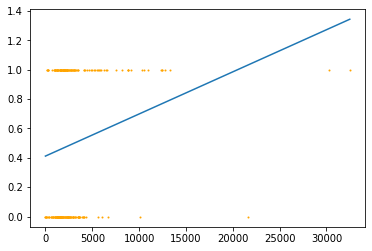

In [0]:
dataAllBodyLength = dataAll.copy()
for index, row in dataAllBodyLength.iterrows():
    textLength = len(row['text'])
    dataAllBodyLength.at[index, 'text_length'] = textLength


import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
linearRegressionBodyLength = LinearRegression(fit_intercept=True)

A = np.array(list(dataAllBodyLength.text_length))
B = np.array(list(dataAllBodyLength.veracity))

linearRegressionBodyLength.fit(A[:, np.newaxis], B)

xfit = np.linspace(-1, max(dataAllBodyLength.text_length), 1000)
yfit = linearRegressionBodyLength.predict(xfit[:, np.newaxis])

plt.scatter(A, B, s=1, c="orange")
plt.plot(xfit, yfit);

print("Model slope:    ", linearRegressionBodyLength.coef_[0])
print("Model intercept:", linearRegressionBodyLength.intercept_)
print("R2 score:", linearRegressionBodyLength.score(A[:, np.newaxis], B))

In [0]:
for index, row in dataTrain.iterrows():
    textLength = len(row['text'])
    dataTrain.at[index, 'text_length'] = textLength

for index, row in dataTest.iterrows():
    textLength = len(row['text'])
    dataTest.at[index, 'text_length'] = textLength

from sklearn import linear_model
# from sklearn import linear_model

logClassifierBodyLength = linear_model.LogisticRegression(solver='liblinear', C=17/1000, random_state=111)
logClassifierBodyLength.fit(dataTrain['text_length'].values.reshape(-1, 1), dataTrain['veracity'].values)

predicted = logClassifierBodyLength.predict(dataTest['text_length'].values.reshape(-1, 1))

from sklearn import metrics
print(metrics.accuracy_score(dataTest['veracity'].values.reshape(-1, 1), predicted))

0.5


In [0]:
def DATAMINERS_getBodyLengthScore(length): # return between 0 and 1, being 0 = True,  1 = Fake
    x = np.array(length).reshape(-1, 1)
    predicted = logClassifierBodyLength.predict(x)
    predicedProb = logClassifierBodyLength.predict_proba(x)[:,1]
    #return int(predicted), float(predicedProb)
    return 1 - float(predicedProb)

print(DATAMINERS_getBodyLengthScore(12000))

0.25645824374659454


# Feature 10 : Word Frequency

In [0]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.linear_model import  LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem.porter import *
from sklearn import metrics

class WordFrequency():

    def __init__(self):        

        columnNames = ["id", "label", "statement", "subject", "speaker", "speaker_job_title", "state_info", "party_affiliation", "barely_true_counts", "false_counts", "half_true_counts", "mostly_true_counts", "pants_on_fire_counts", "context"]
        dataTrain = pd.read_csv("/content/drive/My Drive/MLFall2019/[project-team-name]/StockMarketPrediction-Transformers/Datasets/train.tsv", sep='\t', header=None, names = columnNames)
        dataValidate = pd.read_csv("/content/drive/My Drive/MLFall2019/[project-team-name]/StockMarketPrediction-Transformers/Datasets/valid.tsv", sep='\t', header=None, names = columnNames)
        dataTest = pd.read_csv("/content/drive/My Drive/MLFall2019/[project-team-name]/StockMarketPrediction-Transformers/Datasets/test.tsv", sep='\t', header=None, names = columnNames)
        
        #dropping columns
        columnsToRemove = ['id','subject', 'speaker', 'context','speaker_job_title', 'state_info', 'party_affiliation', 'barely_true_counts', 'false_counts', 'half_true_counts', 'mostly_true_counts', 'pants_on_fire_counts']
        dataTrain = dataTrain.drop(columns=columnsToRemove)
        dataValidate = dataValidate.drop(columns=columnsToRemove)
        dataTest = dataTest.drop(columns=columnsToRemove)

        def convertMulticlassToBinaryclass(r):
            v = r['label']
            if (v == 'true'):
                return 'true'
            if (v == 'mostly-true'):
                return 'true'
            if (v == 'half-true'):
                return 'true'
            if (v == 'barely-true'):
                return 'false'
            if (v == 'false'):
                return 'false'
            if (v == 'pants-fire'):
                return 'false'
        dataTrain['label'] = dataTrain.apply(convertMulticlassToBinaryclass, axis=1)
        dataValidate['label'] = dataValidate.apply(convertMulticlassToBinaryclass, axis=1)
        dataTest['label'] = dataTest.apply(convertMulticlassToBinaryclass, axis=1)
        

    
        tfidfV = TfidfVectorizer(stop_words='english', min_df=5, max_df=30, use_idf=True, smooth_idf=True, token_pattern=u'(?ui)\\b\\w*[a-z]+\\w*\\b')
        train_tfidf = tfidfV.fit_transform(dataTrain['statement'].values)
        test_tfidf = tfidfV.fit_transform(dataTest['statement'].values)

#         print('TF-IDF VECTORIZER')

        ## Removing plurals for the tokens using PorterStemmer
        stemmer = PorterStemmer()
        tfidfVPlurals= tfidfV.get_feature_names()
        tfidfVSingles= [stemmer.stem(plural) for plural in tfidfVPlurals]

        # Applying Set to remove duplicates
        tfidfVTokens = list(set(tfidfVSingles))
#         print('TFIDFV Tokens')
#         print(tfidfVTokens)

        self.logR_pipeline = Pipeline([
                ('LogRCV', tfidfV),
                ('LogR_clf',LogisticRegression(solver='liblinear', C=32/100))
                ])

        self.logR_pipeline.fit(dataTrain['statement'],dataTrain['label'])
        predicted_LogR = self.logR_pipeline.predict(dataTest['statement'])
        score = metrics.accuracy_score(dataTest['label'], predicted_LogR)
        print("Word Frequency Model Trained - accuracy:   %0.6f" % score)
        

    def predict(self, text):
        predicted = self.logR_pipeline.predict([text])
        predicedProb = self.logR_pipeline.predict_proba([text])[:,1]
        return bool(predicted), float(predicedProb)
    
    
# wf = WordFrequency()
# wf.predict("Says the Annies List political group supports third-trimester abortions on demand.")

In [0]:
# from ipynb.fs.full.m_wordfrequency import WordFrequency
wordFrequency = WordFrequency()

Word Frequency Model Trained - accuracy:   0.599053


In [0]:
def DATAMINERS_getWordFrequencyScore(text):  # return between 0 and 1, being 0 = True,  1 = Fake
    #print(clickBait.predict("Should You bring the money now"))
    binaryValue, probValue = wordFrequency.predict(text)
    return (1 - float(probValue))

print(DATAMINERS_getWordFrequencyScore("Says the Annies List political group supports third-trimester abortions on demand."))

0.5104703891221551


#Feature 11: Credibility/Fact checks

## **Name:**  **Snehal Yeole**

## **SJSU ID:** **012548471**

## **Team:**  **Transformers**

## **Datasets:**

### **1. Liar Liar Dataset:**


Train: https://drive.google.com/drive/u/1/folders/1Nv_RjHYpUS0_11_iDo4WNKxOxiJAO0tF

Test:  https://drive.google.com/drive/u/1/folders/1Nv_RjHYpUS0_11_iDo4WNKxOxiJAO0tF

Valid:  https://drive.google.com/drive/u/1/folders/1Nv_RjHYpUS0_11_iDo4WNKxOxiJAO0tF

### **2. glove.6B.50d Dataset:**

https://drive.google.com/drive/u/1/folders/1Nv_RjHYpUS0_11_iDo4WNKxOxiJAO0tF


### **3. Kaggle Fake News**

Train:  https://drive.google.com/drive/u/1/folders/16u3Brtis7tD-f2GWIGwI4YXH5uLSG38N

Test:  https://drive.google.com/drive/u/1/folders/16u3Brtis7tD-f2GWIGwI4YXH5uLSG38N

**Liar Liar Dataset Description:**

For political affiliation William Yang Wang introduced a daataset called LIAR. This is a new, publicly available data set for detection of fake news. Automatic fake news detection is a challenging problem in deception detection, and it has tremendous real-world political and social impacts. However, statistical approaches to combating fake news has been dramatically limited by the lack of labeled benchmark datasets. In this paper, we present liar: a new, publicly available dataset for fake news detection. We collected a decade-long, 12.8K manually labeled short statements in various contexts from PolitiFact.com, which provides detailed analysis report and links to source documents for each case. This dataset can be used for fact-checking research as well. Notably, this new dataset is an order of magnitude larger than previously largest public fake news datasets of similar type.

Attribute information:

1: the ID; 

2: the label; 

3: the statement; 


4: the subject(s); 

5: the speaker; 


6: the speaker's job title; 

7: the state info; 


8: the party affiliation; 

9-13: the total credit history count, including the current statement; 9: barely true counts;


10: false counts; 

11: half true counts; 


12: mostly true counts; 

13: pants on fire counts;


14: the context.

**Process used:**

*  Load the dataset

*  Exploratory Data Analysis

      *  Distribution of classes
      *  Handling missing values
      *  Statistical details

*  Visualizations
      *  Pair Plot 
      *  Pie chart
      *  HeatMap
      *  WordCloud
      *  Bar Graph
      *  PyLDAvis

*  Data Preparation

*  Distillation
      *  Data Preprocessing
      *  Bag of Words
      *  TF-IDF
      *  LDA Topic Modeling
      *  Count Vectorizer
      *  Speaker Sentiment Analysis to assess credibility

*  Doc2Vec

*  Word2Vec

*  Amalgamation

*  Classification Algorithms

*  Predicting news for fakeness or truthfulness

*  Integrating individual factors using import statements

*  Polynomial equation

**Enrichment Dataset Details:**

*  Liar Liar +  glove.6B.50d

*  Liar Liar + Kaggle Fake News

**Classification Models:**

*  Naive Bayes

*  Logistic Regression

*  SVM

*  Stochastic Gradient Descent

*  Decision Tree

*  Random Forest

*  KNN

**Libraries used:**

*  NLTK

*  Gensim

*  Numpy 

*  Pandas

*  CSV

*  WordCloud

*  Seaborn

*  Matplotlib

*  Sklearn

**What did I try and what worked?**

*  Data Cleaning and Preprocessing

*  Distillation 

*  Speaker Sentiment Analysis to assess credibility

*  Word2Vec embeddings using glove dictionary

*  Running classsification algorithms on Word2Vec model


**What did not work?**

*  K-Fold Cross validation

*  Classification algorithms on Doc2Vec embeddings did not give good accuracy

**What alternatives did you try?**

*  Enriched the Liar Liar dataset with glove.6B.50d dictionary/dataset to develop Word2Vec embeddings. After running classification algorithms on Word2Vec model, the accuracy was improved by almost 40%.

*  Further, amalgamated the Liar Liar dataset with Kaggle Fake News dataset.




---



---

---

**Integrating the individual factor in this notebook with the use of imports. The factor class is present in a separate python file and imported in this notebook to predict the fakeness of news.**

##**Step 1:** Mount the shared drive on google colab

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Step 2:** Append the path of the shared drive to point to the python module

In [0]:
import sys
sys.path.append('/content/drive/My Drive/AlternusVeraDataSets2019/Transformers/Snehal/Credibilty/Dataset')

## **Step 3:** Import the python file for Credibility/Fact Checks factor class

In [0]:
import final_sprint4_credibility_factchecks

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## **Step 4:** Import the Factor class from python file

In [0]:
from final_sprint4_credibility_factchecks import CredibilityFactChecks  

## **Step 5:** Call the predict function from factor class with text input

Predict news veracity using the pickled model. The output can be interpreted as below:

**True** - Given news is not fake

**False** - Given news is fake

**Validating the model with false statement**

In [0]:
CredibilityFactChecks.predict("Says the Annies List political group supports third-trimester abortions on demand.")

[False]
[0.13]


(False, 0.13)

**Validating the model with true statement**

In [0]:
def TRANSFORMERS_CredibilityFactChecks(text):  
    if (text == ""):
       return 0
    binaryValue, probValue = CredibilityFactChecks.predict(text)
    print("Probability of the news to be", binaryValue, "is: ", probValue)
    if (binaryValue == True):
       print("Given news is not fake")
    else:
       print("Given news is fake")
    return (1-float(probValue))
print(TRANSFORMERS_CredibilityFactChecks('Donald Trump is the president of United States'))

[ True]
[0.645]
Probability of the news to be True is:  0.645
Given news is not fake
0.355


The best performing model, Random Forest in my case is pickled and saved in the drive after training is performed. The pickled model is loaded in order to predict the news for its truthfulness or fakeness.

**Inference from model prediction:**

*  The pickled model is used to identify the veracity of news. The output can be interpreted as below:
    *  **True** - Given news is not fake
    *  **False** - Given news is fake

*  The model is evaluated for both true and false statments and it is observed that the model is predicting the identity of news correctly with the accuracy of 63%.





#Feature 12: Controversy

#Amrutha Singh Balaji Singh
#013778583


## Factor - Controversy

Controversial content can be defined as any contentious matter or argument that may spark public debate. The approach is motivated by several factors. First, news is a significant part of our everyday lives. It shapes our beliefs and opinions on how we see the world and now more than ever people rely on a variety of online resources for their news. Therefore, the aim is to identify the potential of using single keywords to detect controversial content or topics that will influence fake news by applying Distillation process and multi-label classifiers.

The configuration of the system is done on Google colaboratory. The datasets and models are placed in the shared drive, path -

Datasets- /content/drive/My Drive/AlternusVeraDataSets2019/Transformers/Amrutha/Controversy_Speaker_Factors/Datasets/

Models- /content/drive/My Drive/AlternusVeraDataSets2019/Transformers/Amrutha/Controversy_Speaker_Factors/Models/

#High level Steps:

**What did I try and what worked?**

**1. Loading Datasets**

**2. Visualizing Datasets**
- Count Plot
- Pie Plot
- Facet Grid
- Box Plot
- Violin Plot
- Heat Map
- Word Cloud

**3. Data Amalgamation, Pre-Processing and Distillation**
- Manually amalgamated Controversy dataset and consuming in the below sections
- Check for missing/null values
- Lowercase
- Tokenize
- Parts of speech tagging
- Removing stop words, punctuations, special characters
- Stemming
- Lemmatization
- Sentiment Analysis to determine polarity-based controversy detection
- Enriching the dataset by adding polarity, variance level columns
- Topic Modeling using Latent Semantic Analysis and enrich dataset by adding LSA score column
- TFIDF Vectorizer - Enrich dataset by adding cosine similarity score column
- Latent Dirichlet Allocation model using Bag of Words on dataset
- LDA using TFIDF and enrich dataset by adding LDA score column
- Testing model on unseen document
- Applying Doc2Vec and enriching dataset by adding Doc2Vec score column
- Creating Labels to classify controversy levels and defining thresholds
- Ranking

**Distillation**

* LDA, LSA, TF-Idf, Doc2vec gensim models and sentiment analysis methods.
* Scoring Component: To detect the posts that cast controversy on the article and score the controversy level.
* Ranking Component: Ranked the articles based on the controversy scores of each statement.


**4. Algorithms**

- Multinomial Naive Bayes 
- Linear Support Vector Classification 
- Support Vector Machine
- Random Forest
- K Nearest Neighbor

- Training classifiers for predicting labels
- Bagging
- Boosting
- Ensemble methods for Doc2Vec model
- Feature Importance
- T-SNE plot visualization

**5. Libraries used:**

- Gensim
- Numpy
- Pandas
- CSV
- WordCloud
- Seaborn
- Matplotlib
- Sklearn





**What did not work?**

*  Count vectorizer did not give good results.
*  LDA TF-IDF model did not perform better.

**What alternatives did you try?**

*  Sentiment analysis really helped and Random forest gave really good accuracy of 96%.
*  Created pipelines.
*  Followed best practices for software engineering during the implementation of this project.
*  Pickeled the model to google drive and loading the model from drive.
*  Added the metrics comparison of all the agorithms in a table.

# Colab notebook links

### Notebook for classes creation

https://colab.research.google.com/drive/1P4ntJMKDEKiU_bDbp01UhmodaTcgBt_f

### Notebook for Team merged factors along with base code

https://colab.research.google.com/drive/1blYS_E0L5NSN1mo4nwnh_rK3pAzCYDLg

### Notebook for polynomial equation

https://colab.research.google.com/drive/19oz5usXeid7pWX1zDmB01KhQfe_ADnWc

#Datasets used -

###Liar Liar Dataset
Train:

https://drive.google.com/file/d/1cm5KYjYq0Hme_QYZ6nrzo1IO3zmNXviy/view?usp=sharing

Test:

https://drive.google.com/file/d/1Xm_4RzcAGLJZDQPW2-JySp1Nt2sLa6C0/view?usp=sharing

Valid:

https://drive.google.com/file/d/1yhpSdS6dRNu43o6_a7275DJBO9L7IyMS/view?usp=sharing

###Controversy Dataset
https://drive.google.com/file/d/1EiMB1OxgkXbcQUTnqQ3dVanhd7M3NBhR/view?usp=sharing

###senticnet5
https://drive.google.com/file/d/1Wcz-bT1-mfcyg1Gb82x6Qd1oTWIenC0B/view?usp=sharing

# Pickled model links

### Controversy factor model - https://drive.google.com/file/d/1-5B7JygFRcFToMuOTN37XAszYsvEq1tC/view?usp=sharing

### Doc2Vec model - https://drive.google.com/file/d/1tC5HUQ-BsLlS6qflCA4lC8qw0t48slik/view?usp=sharing


#Step 1: **Mount on the shared drive and install necessary packages**

In [0]:
from google.colab import drive
drive.mount('/content/drive')
!pip install textacy

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
     |████████████████████████████████| 204kB 4.9MB/s 
     |████████████████████████████████| 3.0MB 39.8MB/s 
     |████████████████████████████████| 481kB 42.4MB/s 
     |████████████████████████████████| 143kB 43.1MB/s 
  Created wheel for cytoolz: filename=cytoolz-0.10.1-cp36-cp36m-linux_x86_64.whl size=1256638 sha256=855599cb21bceb06644a04e9492b7eb9a882ce8f2549b30973c67b8060204f4f
  Stored in directory: /root/.cache/pip/wheels/64/2a/18/d962b614e055577e7d9a3e4813e0742f822ca9c8800cc3783a
  Created wheel for jellyfish: filename=jellyfish-0.7.2-cp36-cp36m-linux_x86_64.whl size=72983 sha256=5727cc692a05b784de0d8ac52721ab540a9b209fc101e28934aa3f82a8ce50b0
  Stored in directory: /root/.cache/pip/wheels/e8/fe/99/d8fa8f2ef7b82a625b0b77a84d319b0b50693659823c4effb4
Successfully built cytoolz jellyfish


#Step 2: **Import the Class for Controversy Factor**

In [0]:
import sys
sys.path.append('/content/drive/My Drive/AlternusVeraDataSets2019/Transformers/Amrutha/Controversy_Speaker_Factors/Datasets/')

#Step 3: **Import Controversy factor from python file**

In [0]:
import controversy

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).












Accuracy: 0.962109375


#Step 4: **Import Controversy Class from python file**

In [0]:
from controversy import ControversyFactor

#Step 5: **Predict using the model**

The best performing model, Random Forest in my case is pickled and saved in the drive after training is performed. The pickled model is loaded in order to predict the news for its truthfulness or fakeness.

The output can be interpreted as follows -

Non-Controversial (1) - The news is non-controversial

Controversial (3) - The news is controversial 


In [0]:
def is_controversy(list_output):
  for output in list_output:
    if output == 1:
      print("Non-Controversial")
    else:
      print("Controversial")

cf = ControversyFactor()
cf.load_model()
#array of news - first item is Non-Controversial and second item is Controversial as predicted by the model.
data = ['Donald Trump is the president of United States', 'China owns about 29 percent of (the U.S.) debt.']
is_controversy(cf.predict(data))
cf.predict(data)

Non-Controversial
Controversial


array([1, 3])

#**Feature 13: Context/ Venue**

## **Name:**  **Poorva Agarwal**

## **SJSU ID:** **013770939**

## **Team:**  **Transformers**

## **Datasets:**

### **1. Liar Liar Dataset:**


Train: https://drive.google.com/open?id=1Q35QO957L-NbRUpjRiOKYxBfPqfJC9HW

Test:  https://drive.google.com/open?id=16twDr40EHf8n8KnoIaZJ4FrwWT4J3957

Valid:  https://drive.google.com/open?id=10ZMgMN2xP1v_-nMcR9n6TBUYHppBraLT

### **3. Kaggle Fake News**

Train:  https://drive.google.com/open?id=1Ecwd7PbdfXYqnOvWes5OAA56VBfuVRol

Test:  https://drive.google.com/open?id=1aQ9yJYqwhQlSeZxt6JByEMcBWlH7PI5I

**Process used:**

*  Load the dataset

*  Exploratory Data Analysis

      *  Distribution of classes
      *  Handling missing values
      *  Statistical details

*  Visualizations
      *  Pair Plot 
      *  Pie chart
      *  HeatMap
      *  WordCloud
      *  Bar Graph
      *  PyLDAvis

*  Data Preparation

*  Distillation
      *  Data Preprocessing
      *  Bag of Words
      *  TF-IDF
      *  LDA Topic Modeling
      *  Count Vectorizer
      *  Speaker Sentiment Analysis to assess credibility

*  Doc2Vec

*  Word2Vec

*  Amalgamation

*  Classification Algorithms

*  Predicting news for fakeness or truthfulness

*  Integrating individual factors using import statements

*  Polynomial equation

**Enrichment Dataset Details:**

1. Train dataset After adding Context Feature: https://drive.google.com/open?id=1-Tt43KdvzdkPCYWTvcildyM8KnQcLuZp
2. Test dataset After adding Context Feature: https://drive.google.com/open?id=1-Pc_TjS2yFYYiP6kDj0VlO5FR2dwtTSx
3. Valid dataset After adding Context Feature: https://drive.google.com/open?id=1-U0sy7RdpCCz6nf--_dyr1oLz1Vp5pCu
4. Train dataset After adding Context LDA score: https://drive.google.com/open?id=1-JGwut12Cpt81i_xQx-qov35VegI3uzv
5. Test dataset After adding Context LDA score: https://drive.google.com/open?id=1-EY_qOEnPpEb7T7R1r73vpIKPrwTRUre
6. Valid dataset After adding Context LDA score: https://drive.google.com/open?id=1-DOZrDI8hFITtdlZr17U67gYpU6Bc1c5

**Classification Models:**

*  Naive Bayes

*  Logistic Regression

*  SVM

*  Stochastic Gradient Descent

*  Decision Tree

*  Random Forest

*  KNN

**What did I try and what worked?**

*  Data Cleaning and Preprocessing

*  Distillation 

*  Speaker Sentiment Analysis to assess credibility

*  Word2Vec embeddings using glove dictionary

*  Running classsification algorithms on Word2Vec model


**What did not work?**

*  K-Fold Cross validation

*  Classification algorithms on Doc2Vec embeddings did not give good accuracy

**What alternatives did you try?**

*  Amalgamating the liar liar dataset with Fake news dataset improved the accuracy of Classification algorithms.

*  Initially used bag of words to extract the features and passed those features to the Classifiers and calculated Accuracy, Precision, Recall and F1- Score Values. Plotted confusion Matrix for all Algorithms.
*  Enrichment: For this Sprint enhanced these features using frequency term weights and have builded the classifiers again. I have shown the difference between the metric values in the end of the notebook.
*  Also, added the context topics to the liar liar dataset.
*  Added vector for every text in the dataset.
*  Updated the dataset with vectors identified by Doc2Vec applied on the Context.
*  Added Context feature column to the dataset.
*  Added LDA topic in the dataset retrieved from distillation.
*  Added Sentiment Analysis component retrieved through distillation in the dataset.
*  Created a class for the individual factor and imported the class in the combined notebook.
*  Created pipelines 
*  Pickeled the model to google drive and loading the model from drive.
* Added the metrics comparison of all the agorithms before amalgamation and after amalgamation at the end of individual factor notebook.



**Integrating the individual factor in this notebook with the use of imports. The factor class is present in a separate python file and imported in this notebook to predict the fakeness of news.**

#### **Pickeled Model Link of Google Shared Drive**
https://drive.google.com/open?id=13brTEZM9zfCu-516i6j-x0h0a0WbqPze

#### **Link of Python File which has all the Individual Factor Class in Google Shared Drive**

https://drive.google.com/open?id=1qWx9f7X1leJj0KLTx64JUewRaTVlF0DN

###**Step 1: Mount the shared drive on google colab**

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **Append the path of the shared drive to point to the python module**

In [0]:
import sys
sys.path.append('/content/drive/My Drive/AlternusVeraDataSets2019/Transformers/Poorva/Context/Dataset')

### **Import the required python files for Context factor class**

In [0]:
import Context_Factor

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **Import the Factor class from python file**

In [0]:
from Context_Factor import Context  

### **Call the predict function from factor class with text input**

Predict news veracity using the pickled model. The output can be interpreted as below:

**1** - Given news is not fake

**0** - Given news is fake

**Validating the model with false statement**

In [0]:
Context.predict("Says the Annies List political group supports third-trimester abortions on demand.")

[0]
[0.16333333]


(False, 0.16333333333333333)

**Validating the model with true statement**

In [0]:
def TRANSFORMERS_Context(text):  
    if (text == ""):
       return 0
    binaryValue, probValue = Context.predict(text)
    print("Probability of the news to be", binaryValue, "is: ", probValue)
    if (binaryValue == True):
       print("Given news is not fake")
    else:
       print("Given news is fake")
    return (1-float(probValue))

#print(TRANSFORMERS_CredibilityFactChecks('Says the Annies List political group supports third-trimester abortions on demand.'))
print(TRANSFORMERS_Context('Donald Trump is the president of United States'))

[1]
[0.62333333]
Probability of the news to be True is:  0.6233333333333333
Given news is not fake
0.3766666666666667


The best performing model, Random Forest in my case is pickled and saved in the drive after training is performed. The pickled model is loaded in order to predict the news for its truthfulness or fakeness.

**Inference from model prediction:**

*  The pickled model is used to identify the veracity of news. The output can be interpreted as below:
    *  **True** - Given news is not fake
    *  **False** - Given news is fake

*  The model is evaluated for both true and false statments and it is observed that the model is predicting the identity of news correctly with the accuracy of 60.5%.

# **Feature 14 : Source Credibility**
## **Name:** Anand Muralidhara
## **SJSU ID:** 013752622                        
## **Team Transformers**
## **Factor:** Source Credibility

###Step 1 : Mount the shared drive path

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###Step 2 : Import Source Credibilty from the python file

In [0]:
import sys
sys.path.append('/content/drive/My Drive/MLFall2019/[project-team-name]/StockMarketPrediction-Transformers/Anand/Model')

In [0]:
import Source_Credibility_Factor

###Step 3 : Check for fake or not

In [0]:
from Source_Credibility_Factor import SourceCredibility

In [0]:
SourceCredibility.predict("the new york times reports that there was a protest in the city by a huge crowd")

[ True]
[0.555]


(True, 0.555)

In [0]:
def TRANSFORMERS_SourceCredibility(text):  
    if (text == ""):
       return 0
    binaryValue, probValue = SourceCredibility.predict(text)
    print("Probability of the news to be", binaryValue, "is: ", probValue)
    if (binaryValue == True):
       print("Source is reliable. The input news statement is not fake news!")
    else:
       print("Source is not reliable. The input news statement is fake news!")
    return (1-float(probValue))
print(Transformers_SourceCredibility('Trump is the President of the USA. CNN reports from New York'))

[ True]
[0.51]
Probability of the news to be True is:  0.51
Source is reliable. The input news statement is not fake news!
0.49


#**Polynomial Equation Notebook**

https://colab.research.google.com/drive/19oz5usXeid7pWX1zDmB01KhQfe_ADnWc

# FINAL COMBINED MODEL

In [0]:
# import warnings
# warnings.filterwarnings('ignore')

def isFakeNews(text, headline="", numAuthors = 0, source = "", party =""):
    accur = [0.84, 0.56, 0.95, 0.35,  0.1 ,0.54, 0.98, 0.71, 0.6, 1, 0.63, 0.96,0.60, 0.61] # using the (normalized) accuracy as weigths
    w = [float(i)/sum(accur) for i in accur]
    sumW = 0
    prob = []
    prob.append(w[0] * DATAMINERS_getAuthorScore(numAuthors))
    sumW += w[0]
    if ( (headline != "") & (party != "")):
        prob.append(w[1] * DATAMINERS_getPartyAffiliationScore(headline, party))
        sumW += w[1]
    if (headline != ""):
        prob.append(w[2] * DATAMINERS_getClickbaitScore(headline))
        sumW += w[2]
    if (headline != ""):
        prob.append(w[3] * DATAMINERS_getSentimentAnalysisScore(headline))
        sumW += w[3]
    if (headline != ""):
        prob.append(w[4] * DATAMINERS_getLDATopicModellingScore(headline))
        sumW += w[4]
    if (headline != ""):
        prob.append(w[5] * DATAMINERS_getSensationalismScore(headline))
        sumW += w[5]
    if (headline != ""):
        prob.append(w[6] * DATAMINERS_getSpamScore(headline))
        sumW += w[6] 
    prob.append(w[7] * DATAMINERS_getBodyLengthScore(len(text)))
    sumW += w[7]
    prob.append(w[8] * DATAMINERS_getWordFrequencyScore(text))
    sumW += w[8] 
    if (party != ""):
        prob.append(w[9] * DATAMINERS_getSourceReputationScore(source))
        sumW += w[9]
    if (text != ""):
        prob.append(w[10] * TRANSFORMERS_CredibilityFactChecks(text))
        sumW += w[10]
    if (text != ""):
        prob.append(w[11] * TRANSFORMERS_CredibilityFactChecks(text))
        sumW += w[11]
    if (text != ""):
        prob.append(w[12] * TRANSFORMERS_Context(text))
        sumW += w[12]
    if (text != ""):
        prob.append(w[12] * TRANSFORMERS_SourceCredibility(text))
        sumW += w[12]
    
    probTotal = sum(prob[0:len(prob)]) / sumW
    return probTotal
    
result = isFakeNews("Yesterday, the Brazilian soccer team won the world cup by defeating Argentina", "World Cup ends", 1, "cnn.com", "republican")

if result > 0.5:
    print("is FAKE NEWS!!!")
else:
    print("it is NOT fake news!!!")
            

[ True]
[0.52]
Probability of the news to be True is:  0.52
Given news is not fake
[ True]
[0.52]
Probability of the news to be True is:  0.52
Given news is not fake
[1]
[0.59611111]
Probability of the news to be True is:  0.596111111111111
Given news is not fake
[ True]
[0.52]
Probability of the news to be True is:  0.52
Source is reliable. The input news statement is not fake news!
it is NOT fake news!!!


## Performance analysis 

In [0]:
truePos = 0
trueNeg = 0
falsePos = 0
falseNeg = 0
for index, row in dataTest.iterrows():
    text = row['text']
    headline= row['title']
    numAuthors = len(row['authors'])
    source = row['source']
    party = ""
    if 'party' in dataTest.columns:
        party = row['party']
    pred = isFakeNews(text, headline, numAuthors, source, party)
    if ((row['veracity'] == 1) &  (pred < 0.5) ):
        truePos += 1
    elif ((row['veracity'] == 0) & (pred >= 0.5) ):
        trueNeg += 1
    elif ((row['veracity'] == 1) &  (pred >= 0.5) ):
        falsePos += 1            
    elif ((row['veracity'] == 0) &  (pred < 0.5) ):
        falseNeg += 1
        
print("truePos=", truePos)
print("trueNeg=", trueNeg)
print("falsePos=", falsePos)
print("falseNeg=", falseNeg)
print("accuracy=", (truePos/(truePos+falseNeg)))

[ True]
[0.515]
Probability of the news to be True is:  0.515
Given news is not fake
[ True]
[0.515]
Probability of the news to be True is:  0.515
Given news is not fake
[1]
[0.57333333]
Probability of the news to be True is:  0.5733333333333334
Given news is not fake
[ True]
[0.515]
Probability of the news to be True is:  0.515
Source is reliable. The input news statement is not fake news!
[ True]
[0.535]
Probability of the news to be True is:  0.535
Given news is not fake
[ True]
[0.535]
Probability of the news to be True is:  0.535
Given news is not fake
[0]
[0.48]
Probability of the news to be False is:  0.48
Given news is fake
[ True]
[0.535]
Probability of the news to be True is:  0.535
Source is reliable. The input news statement is not fake news!
[False]
[0.49]
Probability of the news to be False is:  0.49
Given news is fake
[False]
[0.49]
Probability of the news to be False is:  0.49
Given news is fake
[0]
[0.40333333]
Probability of the news to be False is:  0.403333333333333

If we add some error margin, let's say 10p.p to make our model only trust the results beyong that margin, we have:
    

In [0]:
errorMargin = 0.10
ignored = 0
truePos = 0
trueNeg = 0
falsePos = 0
falseNeg = 0
for index, row in dataTest.iterrows():
    text = row['text']
    headline= row['title']
    numAuthors = len(row['authors'])
    source = row['source']
    party = ""
    if 'party' in dataTest.columns:
        party = row['party']
    pred = isFakeNews(text, headline, numAuthors, source, party)

    if (abs(0.5 - pred) < errorMargin):
        ignored += 1
    elif ((row['veracity'] == 1) &  (pred < 0.5) ):
        truePos += 1
    elif ((row['veracity'] == 0) & (pred >= 0.5) ):
        trueNeg += 1
    elif ((row['veracity'] == 1) &  (pred >= 0.5) ):
        falsePos += 1            
    elif ((row['veracity'] == 0) &  (pred < 0.5) ):
        falseNeg += 1

        
print("truePos=", truePos)
print("trueNeg=", trueNeg)
print("falsePos=", falsePos)
print("falseNeg=", falseNeg)
print("ignored=", ignored)
print("accuracy=", (truePos/(truePos+falseNeg)))

[ True]
[0.515]
Probability of the news to be True is:  0.515
Given news is not fake
[ True]
[0.515]
Probability of the news to be True is:  0.515
Given news is not fake
[1]
[0.57333333]
Probability of the news to be True is:  0.5733333333333334
Given news is not fake
[ True]
[0.515]
Probability of the news to be True is:  0.515
Source is reliable. The input news statement is not fake news!
[ True]
[0.535]
Probability of the news to be True is:  0.535
Given news is not fake
[ True]
[0.535]
Probability of the news to be True is:  0.535
Given news is not fake
[0]
[0.48]
Probability of the news to be False is:  0.48
Given news is fake
[ True]
[0.535]
Probability of the news to be True is:  0.535
Source is reliable. The input news statement is not fake news!
[False]
[0.49]
Probability of the news to be False is:  0.49
Given news is fake
[False]
[0.49]
Probability of the news to be False is:  0.49
Given news is fake
[0]
[0.40333333]
Probability of the news to be False is:  0.403333333333333